# Dataset
딥러닝은 크게 데이터 준비, 모델 구축, 모델 학습, 모델 평가로 구성됩니다.<br>
이번시간에는 첫 번째 단계인 <U>**`데이터셋` 을 구성하고 학습을 위해 가공하는 과정**</U>에 대해 공부해보도록 하겠습니다.<br>

## 0. 데이터셋 다운받기

**<span style="color:red">※ 이번실습에서는 1번~4번까지의 과정을 수행하지 않으셔도 됩니다. (스마트리드 첨부자료 사용)<br> 향후 과제를 진행하실 때 참고하시기 바랍니다.</span>**

### [데이터셋 다운]
1. https://www.kaggle.com/jessicali9530/caltech256/version/2 <br>
페이지 상단에 있는 `Download(1 GB)`버튼 누르기
<img src='https://user-images.githubusercontent.com/46768752/138972510-22507274-7013-49b1-9c3c-0557abce64ee.png' alt='다운로드 버튼' width='500'>

2. 로그인 후, 다시 버튼눌러서 데이터셋 다운받기
3. 다운받아진 `archive.zip` 파일 압축 풀기
4. `256_ObjectCategories` 폴더에 들어가서 200여개의 카테고리와 해당 이미지가 들어있는 것 확인해보기

### [colab 사용]
5. colab 런타임 유형 변경하기
    - 왼쪽 상단에 `런타임` 버튼 누르기 -> `런타임 유형 변경` 버튼 누르기 -> None을 GPU로 바꾸기<br>

6. bathtub, bear, beer-mug 카테고리의 이미지 사용하여 진행 <br>
   세 폴더에서 마음에 드는 사진 10장씩 골라 colab에 이미지 업로드하기
    - 1) colab 왼쪽 bar에서 폴더아이콘 누르기 <br>
    - 2) 마우스 우클릭 --> 새 폴더 --> 'data' 라는 폴더 만들기 <br>
    - 3) 만들어진 data 폴더에 마우스 갖다놓고 2번과 동일한 방법으로 train 폴더 만들기
    - 4) 동일한 방법으로 train 폴더 안에 bathtub, bear, beer-mug 폴더 만들기
    - 5) 마음에 드는 사진 10장 골라서 각 클래스 폴더 안에 넣기 <br>
    (사진 선택해서 해당 폴더에 드래그 하면 업로드 할 수 있습니다.)
    
위 과정을 모두 완료 한다면 데이터셋은 다음과 같은 형태로 구성됩니다.

<p align="center"><img src='https://user-images.githubusercontent.com/46768752/138975455-2fee8a3a-8a60-4e42-81e0-002911ebf621.png' alt='데이터셋 구성' /></p>


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. 데이터셋 구성하기

**데이터셋 구성 과정**은 다음과 같습니다. <br>
> 1) 데이터셋이 저장되어 있는 경로를 파악합니다. <br>
> 2) 데이터 이름(name)과 클래스(class), 그리고 학습을 위해 클래스(class)를 숫자로 나타낸 타겟(target)을 csv 파일에 저장합니다.


- 우선, 필요한 module을 import 해줍니다.

In [ ]:
# 사용할 데이터 준비하기
# https://www.kaggle.com/jessicali9530/caltech256/version/2
import os
from glob import glob
import pandas as pd

현재 데이터는 다음과 같은 형태로 file과 directory가 구성되어 있습니다.

```
./data/train/bathtub/xxx.jpg
./data/train/bathtub/xxx.jpg

./data/train/bear/xxx.jpg
./data/train/bear/xxx.jpg

./data/train/beer-mug/xxx.jpg
./data/train/beer-mug/xxx.jpg
```

- 각 클래스(backpack, butterfly, coin)별로 디렉토리가 따로 구성되어 있음을 알 수 있습니다.
- `glob`를 통해 파일경로를 리스트로 받아옵니다.

In [ ]:
file_path = './data/train/*/*.jpg'

file_list = glob(file_path)
file_list

['./data/train/hambuger/2-7.jpg',
 './data/train/hambuger/2-5.jpg',
 './data/train/hambuger/2-3.jpg',
 './data/train/hambuger/2-10.jpg',
 './data/train/hambuger/2-2.jpg',
 './data/train/hambuger/2-4.jpg',
 './data/train/hambuger/2-6.jpg',
 './data/train/hambuger/2-1.jpg',
 './data/train/hambuger/2-8.jpg',
 './data/train/hambuger/2-9.jpg',
 './data/train/chicken/1-6.jpg',
 './data/train/chicken/1-8.jpg',
 './data/train/chicken/1-2.jpg',
 './data/train/chicken/1-7.jpg',
 './data/train/chicken/1-10.jpg',
 './data/train/chicken/1-3.jpg',
 './data/train/chicken/1-1.jpg',
 './data/train/chicken/1-9.jpg',
 './data/train/chicken/1-5.jpg',
 './data/train/chicken/1-4.jpg',
 './data/train/pizza/4-1.jpg',
 './data/train/pizza/4-5.jpg',
 './data/train/pizza/4-6.jpg',
 './data/train/pizza/4-7.jpg',
 './data/train/pizza/4-2.jpg',
 './data/train/pizza/4-4.jpg',
 './data/train/pizza/4-8.jpg',
 './data/train/pizza/4-10.jpg',
 './data/train/pizza/4-3.jpg',
 './data/train/pizza/4-9.jpg',
 './data/train/pa

- 해당 클래스를 학습에서 사용하기 위해 bathtub는 0으로, bear는 1로, 마지막으로 beer-mug는 2으로 설정하여 `target`이라는 항목에 저장합니다.
- 데이터 이름과 클래스, 타겟을 `pd.DataFrame`을 통해 dataframe으로 구성한 후 `csv`파일로 만들어줍니다.

In [ ]:
data_dict = {'image_name':[], 'class':[], 'target':[], 'file_path':[]}
target_dict = {'chicken':0, 'hambuger':1, 'pasta':2, 'pizza':3}

for path in file_list:

    data_dict['file_path'].append(path) # file_path 항목에 파일 경로 저장

    path_list = path.split(os.path.sep) # os별 파일 경로 구분 문자로 split
    print(path_list)

    data_dict['image_name'].append(path_list[-1])
    data_dict['class'].append(path_list[-2])
    data_dict['target'].append(target_dict[path_list[-2]])

train_df = pd.DataFrame(data_dict)
print('\n<data frame>\n', train_df)

train_df.to_csv("./data/train.csv", mode='w')

['.', 'data', 'train', 'hambuger', '2-7.jpg']
['.', 'data', 'train', 'hambuger', '2-5.jpg']
['.', 'data', 'train', 'hambuger', '2-3.jpg']
['.', 'data', 'train', 'hambuger', '2-10.jpg']
['.', 'data', 'train', 'hambuger', '2-2.jpg']
['.', 'data', 'train', 'hambuger', '2-4.jpg']
['.', 'data', 'train', 'hambuger', '2-6.jpg']
['.', 'data', 'train', 'hambuger', '2-1.jpg']
['.', 'data', 'train', 'hambuger', '2-8.jpg']
['.', 'data', 'train', 'hambuger', '2-9.jpg']
['.', 'data', 'train', 'chicken', '1-6.jpg']
['.', 'data', 'train', 'chicken', '1-8.jpg']
['.', 'data', 'train', 'chicken', '1-2.jpg']
['.', 'data', 'train', 'chicken', '1-7.jpg']
['.', 'data', 'train', 'chicken', '1-10.jpg']
['.', 'data', 'train', 'chicken', '1-3.jpg']
['.', 'data', 'train', 'chicken', '1-1.jpg']
['.', 'data', 'train', 'chicken', '1-9.jpg']
['.', 'data', 'train', 'chicken', '1-5.jpg']
['.', 'data', 'train', 'chicken', '1-4.jpg']
['.', 'data', 'train', 'pizza', '4-1.jpg']
['.', 'data', 'train', 'pizza', '4-5.jpg']
['

## 2. 데이터셋 불러오기

- `1.데이터셋 구성하기` 에서 저장했던 `train.csv` 파일을 통해 데이터셋을 불러옵니다.
- `scikit learn의 train_test_split`를 사용하여 데이터셋을 train, validation, test로 나눠줍니다.


In [ ]:
from sklearn.model_selection import train_test_split

def get_df():

    # cvs 파일 읽어서 DataFrame으로 저장
    df = pd.read_csv('./data/train.csv')

    # 데이터셋을 train, val, test로 나누기
    df_train, df_test = train_test_split(df, test_size=0.2, random_state=2359)
    df_train, df_val = train_test_split(df_train, test_size=0.2, random_state=2359)

    return df_train, df_val, df_test

In [ ]:
# 데이터셋 읽어오기
df_train, df_val, df_test = get_df()
print(len(df_train), len(df_val), len(df_test))

25 7 8


## 3. 학습시, 데이터셋을 사용할 수 있도록 만들기

### 3-1. Dataset Class
- pytorch가 dataset을 어떻게 읽을지 알려주는 class입니다.
- `__len__`과 `__getitem__` 부분은 필수적으로 필요한 method입니다.


```python
class 내가만든_데이터셋(Dataset):
    def __init__(self, csv, mode, meta_features, transform=None):
        # 데이터셋 초기화
    def __len__(self):
        # 데이터셋 크기 리턴
        return self.csv.shape[0]
    def __getitem__(self, index):
        # 인덱스에 해당하는 이미지 리턴
    return data, torch.tensor(self.csv.iloc[index].target).long()

```

In [ ]:
import torch
from torch.utils.data import Dataset
from PIL import Image

class Classification_Dataset(Dataset):
    def __init__(self, csv, mode, transform=None):
        self.csv = csv.reset_index(drop=True)  # random으로 섞인 데이터의 인덱스를 reset 시켜서 다시 부여한다.
        self.transform = transform

    def __len__(self):
        return self.csv.shape[0]  # csv 파일의 행 개수 == 데이터 개수

    def __getitem__(self, index):
        row = self.csv.iloc[index]                       # 주어진 index에 대한 데이터 뽑아오기
        image = Image.open(row.file_path).convert('RGB') # 파일경로로 부터 이미지를 읽고 rgb로 변환하기
        target = torch.tensor(self.csv.iloc[index].target).long()

        if self.transform:
            image = self.transform(image) # 이미지에 transform 적용하기

        return image, target  # 이미지와 target return하기

- `csv.reset_index(drop=True)` 는 아래 결과를 통해 역할을 알 수 있습니다.

In [ ]:
df_train

,Unnamed: 0,image_name,class,target,file_path
9,9,2-9.jpg,hambuger,1,./data/train/hambuger/2-9.jpg
6,6,2-6.jpg,hambuger,1,./data/train/hambuger/2-6.jpg
35,35,3-1.jpg,pasta,2,./data/train/pasta/3-1.jpg
14,14,1-10.jpg,chicken,0,./data/train/chicken/1-10.jpg
17,17,1-9.jpg,chicken,0,./data/train/chicken/1-9.jpg
7,7,2-1.jpg,hambuger,1,./data/train/hambuger/2-1.jpg
32,32,3-10.jpg,pasta,2,./data/train/pasta/3-10.jpg
28,28,4-3.jpg,pizza,3,./data/train/pizza/4-3.jpg
10,10,1-6.jpg,chicken,0,./data/train/chicken/1-6.jpg
3,3,2-10.jpg,hambuger,1,./data/train/hambuger/2-10.jpg


In [ ]:
df_train.reset_index(drop=True)

,Unnamed: 0,image_name,class,target,file_path
0,9,2-9.jpg,hambuger,1,./data/train/hambuger/2-9.jpg
1,6,2-6.jpg,hambuger,1,./data/train/hambuger/2-6.jpg
2,35,3-1.jpg,pasta,2,./data/train/pasta/3-1.jpg
3,14,1-10.jpg,chicken,0,./data/train/chicken/1-10.jpg
4,17,1-9.jpg,chicken,0,./data/train/chicken/1-9.jpg
5,7,2-1.jpg,hambuger,1,./data/train/hambuger/2-1.jpg
6,32,3-10.jpg,pasta,2,./data/train/pasta/3-10.jpg
7,28,4-3.jpg,pizza,3,./data/train/pizza/4-3.jpg
8,10,1-6.jpg,chicken,0,./data/train/chicken/1-6.jpg
9,3,2-10.jpg,hambuger,1,./data/train/hambuger/2-10.jpg


- `Classification_Dataset`에서 `__len__`과 `__getitem__`의 결과를 확인해보겠습니다.

In [ ]:
from torchvision import transforms
dataset_train = Classification_Dataset(df_train, 'train', transform=transforms.ToTensor())

print(f'>> 데이터 셋 전체 크기, 개수, sample개수 : {dataset_train.__len__()}')
print(f'>> i번째 데이터 불러오기 : dataset_train.__getitem__(i)')
print(f'>> 0번째 데이터 불러와지는 형태 : tuple (이미지 픽셀값, target)\n : {dataset_train.__getitem__(0)}')

>> 데이터 셋 전체 크기, 개수, sample개수 : 25
>> i번째 데이터 불러오기 : dataset_train.__getitem__(i)
>> 0번째 데이터 불러와지는 형태 : tuple (이미지 픽셀값, target)
 : (tensor([[[0.8588, 0.8588, 0.8588,  ..., 0.8314, 0.8353, 0.8353],
         [0.8588, 0.8588, 0.8588,  ..., 0.8314, 0.8314, 0.8353],
         [0.8627, 0.8588, 0.8588,  ..., 0.8314, 0.8314, 0.8314],
         ...,
         [0.8078, 0.8000, 0.8078,  ..., 0.8314, 0.8314, 0.8314],
         [0.8039, 0.8000, 0.8039,  ..., 0.8353, 0.8353, 0.8353],
         [0.8039, 0.8039, 0.8039,  ..., 0.8353, 0.8353, 0.8353]],

        [[0.8667, 0.8667, 0.8667,  ..., 0.8314, 0.8353, 0.8353],
         [0.8667, 0.8667, 0.8667,  ..., 0.8314, 0.8314, 0.8353],
         [0.8706, 0.8667, 0.8667,  ..., 0.8314, 0.8314, 0.8314],
         ...,
         [0.7922, 0.7961, 0.7922,  ..., 0.8039, 0.8039, 0.8039],
         [0.7804, 0.7843, 0.7804,  ..., 0.8078, 0.8078, 0.8078],
         [0.7804, 0.7804, 0.7804,  ..., 0.8078, 0.8078, 0.8078]],

        [[0.8627, 0.8627, 0.8627,  ..., 0.7843, 0.7882, 0

### 3-2. Transforms & Augmentation
#### [Transforms]
- 구축한 데이터셋에서 이미지 파일은 서로 크기가 다를 수 있기 때문에, <U>같은 크기</U>로 맞춰주어야 합니다.
    - `transforms.Normalize([r채널의 mean, g채널의 mean, b채널의 mean], [r채널의 std, g채널의 std, b채널의 std])` : normalize
    - `transforms.Resize()` : 크기 변경
    - `transforms.CenterCrop()`, `transforms.RandomResizedCrop()` : 잘라내기

- 예시
```python
transform = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
                               ])
```
- `transforms.Normalize()`는 이미지의 픽셀값을 정규화하는 과정입니다. <br>
본 과정을 수행해야 원활하게 학습이 이루어지게 됩니다.
3개의 채널로 구성되어 있는 이미지의 경우 아래와 같이 normalize 됩니다.

    - `input[channel] = (input[channel] - mean[channel]) / std[channel]`
    - 입력 픽셀값에 mean을 빼주게 되면 픽셀값이 0을 중심으로 두게 변형되고, std를 나누면 픽셀값이 -1과 1 사이로 분포를 이루게 됩니다.
    - 채널별 mean, std를 구하는 방법은 아래에 나와있습니다.




#### [Augmentation]
- 일반적으로 데이터의 양이 많을수록 좋은 성능을 갖기 때문에, 데이터를 random하게 변경하여 새로운 데이터로 사용하여 학습 시 사용하는 <U>데이터의 양을 늘릴</U> 수 있습니다.
- 입력 이미지를 랜덤하게 변경함으로써 모델이 풀어야 할 문제(예:이미지 클래스 맞추기)를 더 어렵게 만들어 <U>overfitting을 방지</U>하는 데에도 도움이 됩니다.
- https://pytorch.org/vision/stable/transforms.html 에서 더 많은 예시를 보실 수 있습니다.
- 예시
    - `transforms.RandomRotation` : 랜덤하게 회전하기
    - `transforms.RandomHorizontalFlip()` : 랜덤하게 수평으로 뒤집기

In [ ]:
# normalize를 위해 rgb 채널의 mean, std 값 구하기

import numpy as np

dataset_train = Classification_Dataset(df_train, 'train', transform=transforms.ToTensor())

# 데이터(shape:torch.Size([3, 381, 343])) rgb에 대한 mean, std 구하기
rgb_mean = [np.mean(x.numpy(), axis=(1,2)) for x,_ in dataset_train]
rgb_std = [np.std(x.numpy(), axis=(1,2)) for x,_ in dataset_train]


# 각 데이터 채널별로 mean, std 나타내기
c_mean = []
c_std = []
for i in range(3):
    c_mean.append(np.mean([m[i] for m in rgb_mean]))
    c_std.append(np.std([s[i] for s in rgb_std]))

print(f'rgb mean: {c_mean}\nrgb std: {c_std}')

rgb mean: [0.7568027, 0.6478182, 0.5485582]
rgb std: [0.05086553, 0.047307957, 0.06997767]


In [ ]:
from torchvision import transforms

def get_transforms(image_size):

    transforms_train = transforms.Compose([
                                       transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(image_size),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.7669051, 0.65760386, 0.5565754],
                                                            [0.04530642, 0.041517295, 0.064540155])])

    transforms_val = transforms.Compose([transforms.Resize(image_size+30),
                                      transforms.CenterCrop(image_size),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.7669051, 0.65760386, 0.5565754],
                                                            [0.04530642, 0.041517295, 0.064540155])])

    return transforms_train, transforms_val

In [ ]:
# 모델 트랜스폼 가져오기
transforms_train, transforms_val = get_transforms(224)

In [ ]:
# dataset class 객체 만들기
dataset_train = Classification_Dataset(df_train, 'train', transform=transforms_train)
dataset_val = Classification_Dataset(df_val, 'valid', transform=transforms_val)

### 3-3. Data Loaders
- `DataLoader`는 `Classification_Dataset`으로 받아온 데이터(이미지, target)를 **batch**로 묶어 return합니다.

In [ ]:
from torch.utils.data.sampler import RandomSampler
from torch.utils.data import DataLoader

train_loader = torch.utils.data.DataLoader(dataset_train, batch_size=4, sampler=RandomSampler(dataset_train), num_workers=0)
valid_loader = torch.utils.data.DataLoader(dataset_val, batch_size=4, num_workers=0)

- 해당 DataLoader는 generator로, 다음과 같이 데이터를 불러올 수 있습니다.

In [ ]:
for images, targets in train_loader:
    print(f'[batch, channel, ...] : {images.shape}')
    print(targets.shape)

[batch, channel, ...] : torch.Size([4, 3, 224, 224])
torch.Size([4])
[batch, channel, ...] : torch.Size([4, 3, 224, 224])
torch.Size([4])
[batch, channel, ...] : torch.Size([4, 3, 224, 224])
torch.Size([4])
[batch, channel, ...] : torch.Size([4, 3, 224, 224])
torch.Size([4])
[batch, channel, ...] : torch.Size([4, 3, 224, 224])
torch.Size([4])
[batch, channel, ...] : torch.Size([4, 3, 224, 224])
torch.Size([4])
[batch, channel, ...] : torch.Size([1, 3, 224, 224])
torch.Size([1])


#### 데이터 준비 파트는 마무리가 되었습니다. 큰 틀을 살펴보면서 정리해보도록 하겠습니다.

- `0. 데이터셋 다운받기`: 여러분이 수집한 데이터의 클래스별로 폴더를 구성하여 데이터셋을 준비합니다.
- `1. 데이터셋 구성하기`: 저장한 데이터의 정보를 csv 파일로 만듭니다.
- `2. 데이터셋 불러오기`: csv 파일을 통해 데이터를 불러와서 train, validation, test로 나눠줍니다.
- `3. 학습 시, 데이터셋을 사용할 수 있도록 만들기`
    - `3-1. Dataset Class`: pytorch가 dataset을 어떻게 읽을지 알려주는 클래스를 만듭니다. (데이터셋 크기와 지정한 인덱스별로 데이터를 리턴해주는 len, getitem 함수가 포함되어 있습니다.)
    - `3-2. Transforms & Augmentation`: 학습을 위해 데이터를 가공합니다.
    - `3-3. Data Loaders`: 배치별로 데이터를 묶어줍니다. Training시, 배치단위별로 데이터가 호출됩니다.

___

# 4. Model

`VGG16` 모델을 transfer learning하는 방식으로 진행합니다. <br>
자세한 예는 https://pytorch.org/vision/stable/models.html 에 나와있습니다.

<img src='https://user-images.githubusercontent.com/46768752/138986562-1cbfcd9a-da6b-45e8-b4ae-3b2af0d2ae16.png'>

In [ ]:
from torchvision import models
from collections import OrderedDict
import torch.nn as nn

model = models.vgg16(pretrained=True)
# model

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
# Backprop을 수행하지 않도록 parameter들을 동결시키기
# 재학습을 위해, 모든 parameters의 gradient를 꺼놓기
for param in model.parameters():
    param.requires_grad = False

# 마지막 layer를 과제에 맞게 수정하기
classifier = nn.Sequential(OrderedDict([
                          ('fc1', nn.Linear(25088, 500)),
                          ('relu', nn.ReLU()),
                          ('fc2', nn.Linear(500, 4))
                          ]))

model.classifier = classifier

# 5. Training

In [ ]:
import numpy as np
import cv2
import random
import time
import torch.optim as optim

from tqdm import tqdm

## 3-1. Train

In [ ]:
def train_epoch(model, loader, device, criterion, optimizer):

    model.train()   # 모델 train 모드로 바꾸기
    train_loss = []
    bar = tqdm(loader)
    for i, (data, target) in enumerate(bar):

        optimizer.zero_grad()  # 최적화된 모든 변수 초기화

        data, target = data.to(device), target.to(device)  # 지정한 device로 데이터 옮기기
        logits = model(data)              # 1. forward pass

        loss = criterion(logits, target)  # 2. loss 계산
        loss.backward()                   # 3. backward pass

        optimizer.step()                  # 4. gradient descent(파라미터 업데이트)

        loss_np = loss.detach().cpu().numpy() # loss값 가져오기 위해 gpu에 있던 데이터 모두 cpu로 옮기기
        train_loss.append(loss_np)
        bar.set_description('loss: %.5f' % (loss_np))

    train_loss = np.mean(train_loss)  # 한 epoch당 train loss의 평균 구하기
    return train_loss

## 3-2. Validation

In [ ]:
def val_epoch(model, loader, device, criterion):

    model.eval()  # 모델 evaluate 모드로 바꾸기
    val_loss = []
    LOGITS = []
    PROBS = []
    TARGETS = []
    with torch.no_grad():
        for (data, target) in tqdm(loader):

            data, target = data.to(device), target.to(device) # 지정한 device로 데이터 옮기기
            logits = model(data) # 1. forward pass
            probs = logits.softmax(1)  # 다중분류 -> 각 클래스일 확률을 전체 1로 두고 계산하기

            LOGITS.append(logits.detach().cpu())
            PROBS.append(probs.detach().cpu())
            TARGETS.append(target.detach().cpu())

            loss = criterion(logits, target) # 2. loss 계산
            val_loss.append(loss.detach().cpu().numpy())

    val_loss = np.mean(val_loss)
    LOGITS = torch.cat(LOGITS).numpy()
    PROBS = torch.cat(PROBS).numpy()
    TARGETS = torch.cat(TARGETS).numpy()

    # accuracy : 정확도
    acc = (PROBS.argmax(1) == TARGETS).mean() * 100.

    return val_loss, acc

## 3-3. 학습시키기

In [ ]:
    train_loss_data = np.zeros(500)
    val_loss_data = np.zeros(500)
    acc_data = np.zeros(500)

In [ ]:
def run(model, init_lr, n_epochs):

    # gpu 사용
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # model을 지정한 장치로 옮기기
    model = model.to(device)

    # loss function 지정
    criterion= nn.CrossEntropyLoss()

    # optimizer로 adam 사용
    optimizer = optim.Adam(model.parameters(), lr=init_lr)

    for epoch in range(1, n_epochs + 1):
        print(time.ctime(), f'Epoch {epoch}')

        train_loss = train_epoch(model, train_loader, device, criterion, optimizer) # train
        val_loss, acc = val_epoch(model, valid_loader, device, criterion) # validation
        train_loss_data[epoch-1] = train_loss
        val_loss_data[epoch-1] = val_loss
        acc_data[epoch-1] = acc

        content = time.ctime() + ' ' + f'Epoch {epoch}, lr: {optimizer.param_groups[0]["lr"]:.7f}, train loss: {train_loss:.5f}, valid loss: {(val_loss):.5f}, Acc: {(acc):.4f}.'
        print(content)

    torch.save(model.state_dict(), 'best_model.pth')


In [ ]:
run(model, init_lr=4e-6, n_epochs=500)

Thu Nov  2 09:28:43 2023 Epoch 1


100%|██████████| 2/2 [00:00<00:00, 28.96it/s]


Thu Nov  2 09:28:43 2023 Epoch 1, lr: 0.0000040, train loss: 0.06367, valid loss: 0.69499, Acc: 85.7143.
Thu Nov  2 09:28:43 2023 Epoch 2


100%|██████████| 2/2 [00:00<00:00, 31.81it/s]


Thu Nov  2 09:28:44 2023 Epoch 2, lr: 0.0000040, train loss: 0.08100, valid loss: 0.65888, Acc: 85.7143.
Thu Nov  2 09:28:44 2023 Epoch 3


100%|██████████| 2/2 [00:00<00:00, 33.37it/s]


Thu Nov  2 09:28:44 2023 Epoch 3, lr: 0.0000040, train loss: 0.02179, valid loss: 0.67288, Acc: 85.7143.
Thu Nov  2 09:28:44 2023 Epoch 4


100%|██████████| 2/2 [00:00<00:00, 33.85it/s]


Thu Nov  2 09:28:44 2023 Epoch 4, lr: 0.0000040, train loss: 0.03147, valid loss: 0.67736, Acc: 85.7143.
Thu Nov  2 09:28:44 2023 Epoch 5


100%|██████████| 2/2 [00:00<00:00, 32.56it/s]


Thu Nov  2 09:28:45 2023 Epoch 5, lr: 0.0000040, train loss: 0.01269, valid loss: 0.67706, Acc: 85.7143.
Thu Nov  2 09:28:45 2023 Epoch 6


100%|██████████| 2/2 [00:00<00:00, 32.18it/s]


Thu Nov  2 09:28:45 2023 Epoch 6, lr: 0.0000040, train loss: 0.12704, valid loss: 0.75681, Acc: 85.7143.
Thu Nov  2 09:28:45 2023 Epoch 7


100%|██████████| 2/2 [00:00<00:00, 27.05it/s]


Thu Nov  2 09:28:45 2023 Epoch 7, lr: 0.0000040, train loss: 0.16454, valid loss: 0.83249, Acc: 85.7143.
Thu Nov  2 09:28:45 2023 Epoch 8


100%|██████████| 2/2 [00:00<00:00, 27.39it/s]


Thu Nov  2 09:28:46 2023 Epoch 8, lr: 0.0000040, train loss: 0.14447, valid loss: 0.84475, Acc: 85.7143.
Thu Nov  2 09:28:46 2023 Epoch 9


100%|██████████| 2/2 [00:00<00:00, 28.67it/s]


Thu Nov  2 09:28:46 2023 Epoch 9, lr: 0.0000040, train loss: 0.06103, valid loss: 0.80356, Acc: 85.7143.
Thu Nov  2 09:28:46 2023 Epoch 10


100%|██████████| 2/2 [00:00<00:00, 28.41it/s]


Thu Nov  2 09:28:47 2023 Epoch 10, lr: 0.0000040, train loss: 0.04354, valid loss: 0.77289, Acc: 85.7143.
Thu Nov  2 09:28:47 2023 Epoch 11


100%|██████████| 2/2 [00:00<00:00, 28.38it/s]


Thu Nov  2 09:28:47 2023 Epoch 11, lr: 0.0000040, train loss: 0.05149, valid loss: 0.82330, Acc: 85.7143.
Thu Nov  2 09:28:47 2023 Epoch 12


100%|██████████| 2/2 [00:00<00:00, 27.57it/s]


Thu Nov  2 09:28:47 2023 Epoch 12, lr: 0.0000040, train loss: 0.07495, valid loss: 0.77222, Acc: 85.7143.
Thu Nov  2 09:28:47 2023 Epoch 13


100%|██████████| 2/2 [00:00<00:00, 28.37it/s]


Thu Nov  2 09:28:48 2023 Epoch 13, lr: 0.0000040, train loss: 0.08982, valid loss: 0.68972, Acc: 85.7143.
Thu Nov  2 09:28:48 2023 Epoch 14


100%|██████████| 2/2 [00:00<00:00, 24.74it/s]


Thu Nov  2 09:28:48 2023 Epoch 14, lr: 0.0000040, train loss: 0.19881, valid loss: 0.60822, Acc: 85.7143.
Thu Nov  2 09:28:48 2023 Epoch 15


100%|██████████| 2/2 [00:00<00:00, 27.77it/s]


Thu Nov  2 09:28:48 2023 Epoch 15, lr: 0.0000040, train loss: 0.15511, valid loss: 0.53283, Acc: 85.7143.
Thu Nov  2 09:28:48 2023 Epoch 16


100%|██████████| 2/2 [00:00<00:00, 31.25it/s]


Thu Nov  2 09:28:49 2023 Epoch 16, lr: 0.0000040, train loss: 0.08868, valid loss: 0.51918, Acc: 85.7143.
Thu Nov  2 09:28:49 2023 Epoch 17


100%|██████████| 2/2 [00:00<00:00, 28.13it/s]


Thu Nov  2 09:28:49 2023 Epoch 17, lr: 0.0000040, train loss: 0.09421, valid loss: 0.55265, Acc: 85.7143.
Thu Nov  2 09:28:49 2023 Epoch 18


100%|██████████| 2/2 [00:00<00:00, 33.43it/s]


Thu Nov  2 09:28:50 2023 Epoch 18, lr: 0.0000040, train loss: 0.02929, valid loss: 0.57600, Acc: 85.7143.
Thu Nov  2 09:28:50 2023 Epoch 19


100%|██████████| 2/2 [00:00<00:00, 32.45it/s]


Thu Nov  2 09:28:50 2023 Epoch 19, lr: 0.0000040, train loss: 0.06708, valid loss: 0.58210, Acc: 85.7143.
Thu Nov  2 09:28:50 2023 Epoch 20


100%|██████████| 2/2 [00:00<00:00, 31.62it/s]


Thu Nov  2 09:28:50 2023 Epoch 20, lr: 0.0000040, train loss: 0.01479, valid loss: 0.58784, Acc: 85.7143.
Thu Nov  2 09:28:50 2023 Epoch 21


100%|██████████| 2/2 [00:00<00:00, 31.65it/s]


Thu Nov  2 09:28:51 2023 Epoch 21, lr: 0.0000040, train loss: 0.14582, valid loss: 0.61834, Acc: 85.7143.
Thu Nov  2 09:28:51 2023 Epoch 22


100%|██████████| 2/2 [00:00<00:00, 32.71it/s]


Thu Nov  2 09:28:51 2023 Epoch 22, lr: 0.0000040, train loss: 0.00804, valid loss: 0.65465, Acc: 85.7143.
Thu Nov  2 09:28:51 2023 Epoch 23


100%|██████████| 2/2 [00:00<00:00, 34.39it/s]


Thu Nov  2 09:28:51 2023 Epoch 23, lr: 0.0000040, train loss: 0.01130, valid loss: 0.69663, Acc: 85.7143.
Thu Nov  2 09:28:51 2023 Epoch 24


100%|██████████| 2/2 [00:00<00:00, 31.33it/s]


Thu Nov  2 09:28:52 2023 Epoch 24, lr: 0.0000040, train loss: 0.12571, valid loss: 0.70521, Acc: 85.7143.
Thu Nov  2 09:28:52 2023 Epoch 25


100%|██████████| 2/2 [00:00<00:00, 34.50it/s]


Thu Nov  2 09:28:52 2023 Epoch 25, lr: 0.0000040, train loss: 0.14257, valid loss: 0.68357, Acc: 85.7143.
Thu Nov  2 09:28:52 2023 Epoch 26


100%|██████████| 2/2 [00:00<00:00, 31.66it/s]


Thu Nov  2 09:28:52 2023 Epoch 26, lr: 0.0000040, train loss: 0.05117, valid loss: 0.73372, Acc: 85.7143.
Thu Nov  2 09:28:52 2023 Epoch 27


100%|██████████| 2/2 [00:00<00:00, 30.98it/s]


Thu Nov  2 09:28:53 2023 Epoch 27, lr: 0.0000040, train loss: 0.00421, valid loss: 0.75614, Acc: 85.7143.
Thu Nov  2 09:28:53 2023 Epoch 28


100%|██████████| 2/2 [00:00<00:00, 31.65it/s]


Thu Nov  2 09:28:53 2023 Epoch 28, lr: 0.0000040, train loss: 0.10811, valid loss: 0.69141, Acc: 85.7143.
Thu Nov  2 09:28:53 2023 Epoch 29


100%|██████████| 2/2 [00:00<00:00, 30.89it/s]


Thu Nov  2 09:28:53 2023 Epoch 29, lr: 0.0000040, train loss: 0.07223, valid loss: 0.67846, Acc: 85.7143.
Thu Nov  2 09:28:53 2023 Epoch 30


100%|██████████| 2/2 [00:00<00:00, 31.71it/s]


Thu Nov  2 09:28:54 2023 Epoch 30, lr: 0.0000040, train loss: 0.03883, valid loss: 0.67873, Acc: 85.7143.
Thu Nov  2 09:28:54 2023 Epoch 31


100%|██████████| 2/2 [00:00<00:00, 32.90it/s]


Thu Nov  2 09:28:54 2023 Epoch 31, lr: 0.0000040, train loss: 0.11753, valid loss: 0.70220, Acc: 85.7143.
Thu Nov  2 09:28:54 2023 Epoch 32


100%|██████████| 2/2 [00:00<00:00, 32.68it/s]


Thu Nov  2 09:28:54 2023 Epoch 32, lr: 0.0000040, train loss: 0.10428, valid loss: 0.75176, Acc: 85.7143.
Thu Nov  2 09:28:54 2023 Epoch 33


100%|██████████| 2/2 [00:00<00:00, 30.84it/s]


Thu Nov  2 09:28:55 2023 Epoch 33, lr: 0.0000040, train loss: 0.11186, valid loss: 0.83711, Acc: 85.7143.
Thu Nov  2 09:28:55 2023 Epoch 34


100%|██████████| 2/2 [00:00<00:00, 32.06it/s]


Thu Nov  2 09:28:55 2023 Epoch 34, lr: 0.0000040, train loss: 0.04772, valid loss: 0.80949, Acc: 85.7143.
Thu Nov  2 09:28:55 2023 Epoch 35


100%|██████████| 2/2 [00:00<00:00, 33.77it/s]


Thu Nov  2 09:28:55 2023 Epoch 35, lr: 0.0000040, train loss: 0.07772, valid loss: 0.77267, Acc: 85.7143.
Thu Nov  2 09:28:55 2023 Epoch 36


100%|██████████| 2/2 [00:00<00:00, 31.04it/s]


Thu Nov  2 09:28:56 2023 Epoch 36, lr: 0.0000040, train loss: 0.01233, valid loss: 0.73375, Acc: 85.7143.
Thu Nov  2 09:28:56 2023 Epoch 37


100%|██████████| 2/2 [00:00<00:00, 31.39it/s]


Thu Nov  2 09:28:56 2023 Epoch 37, lr: 0.0000040, train loss: 0.03058, valid loss: 0.69881, Acc: 85.7143.
Thu Nov  2 09:28:56 2023 Epoch 38


100%|██████████| 2/2 [00:00<00:00, 31.54it/s]


Thu Nov  2 09:28:57 2023 Epoch 38, lr: 0.0000040, train loss: 0.04365, valid loss: 0.66539, Acc: 85.7143.
Thu Nov  2 09:28:57 2023 Epoch 39


100%|██████████| 2/2 [00:00<00:00, 31.41it/s]


Thu Nov  2 09:28:57 2023 Epoch 39, lr: 0.0000040, train loss: 0.02529, valid loss: 0.67899, Acc: 85.7143.
Thu Nov  2 09:28:57 2023 Epoch 40


100%|██████████| 2/2 [00:00<00:00, 30.92it/s]


Thu Nov  2 09:28:57 2023 Epoch 40, lr: 0.0000040, train loss: 0.14292, valid loss: 0.73323, Acc: 85.7143.
Thu Nov  2 09:28:57 2023 Epoch 41


100%|██████████| 2/2 [00:00<00:00, 32.09it/s]


Thu Nov  2 09:28:58 2023 Epoch 41, lr: 0.0000040, train loss: 0.12535, valid loss: 0.70484, Acc: 85.7143.
Thu Nov  2 09:28:58 2023 Epoch 42


100%|██████████| 2/2 [00:00<00:00, 32.21it/s]


Thu Nov  2 09:28:58 2023 Epoch 42, lr: 0.0000040, train loss: 0.09097, valid loss: 0.69967, Acc: 85.7143.
Thu Nov  2 09:28:58 2023 Epoch 43


100%|██████████| 2/2 [00:00<00:00, 30.38it/s]


Thu Nov  2 09:28:58 2023 Epoch 43, lr: 0.0000040, train loss: 0.01072, valid loss: 0.68865, Acc: 85.7143.
Thu Nov  2 09:28:58 2023 Epoch 44


100%|██████████| 2/2 [00:00<00:00, 29.99it/s]


Thu Nov  2 09:28:59 2023 Epoch 44, lr: 0.0000040, train loss: 0.04744, valid loss: 0.61203, Acc: 85.7143.
Thu Nov  2 09:28:59 2023 Epoch 45


100%|██████████| 2/2 [00:00<00:00, 27.62it/s]


Thu Nov  2 09:28:59 2023 Epoch 45, lr: 0.0000040, train loss: 0.03192, valid loss: 0.56202, Acc: 85.7143.
Thu Nov  2 09:28:59 2023 Epoch 46


100%|██████████| 2/2 [00:00<00:00, 27.49it/s]


Thu Nov  2 09:28:59 2023 Epoch 46, lr: 0.0000040, train loss: 0.12436, valid loss: 0.42834, Acc: 85.7143.
Thu Nov  2 09:28:59 2023 Epoch 47


100%|██████████| 2/2 [00:00<00:00, 27.75it/s]


Thu Nov  2 09:29:00 2023 Epoch 47, lr: 0.0000040, train loss: 0.05673, valid loss: 0.42386, Acc: 85.7143.
Thu Nov  2 09:29:00 2023 Epoch 48


100%|██████████| 2/2 [00:00<00:00, 27.22it/s]


Thu Nov  2 09:29:00 2023 Epoch 48, lr: 0.0000040, train loss: 0.07884, valid loss: 0.44169, Acc: 85.7143.
Thu Nov  2 09:29:00 2023 Epoch 49


100%|██████████| 2/2 [00:00<00:00, 27.16it/s]


Thu Nov  2 09:29:01 2023 Epoch 49, lr: 0.0000040, train loss: 0.03713, valid loss: 0.48924, Acc: 85.7143.
Thu Nov  2 09:29:01 2023 Epoch 50


100%|██████████| 2/2 [00:00<00:00, 26.33it/s]


Thu Nov  2 09:29:01 2023 Epoch 50, lr: 0.0000040, train loss: 0.11668, valid loss: 0.48731, Acc: 85.7143.
Thu Nov  2 09:29:01 2023 Epoch 51


100%|██████████| 2/2 [00:00<00:00, 28.32it/s]


Thu Nov  2 09:29:01 2023 Epoch 51, lr: 0.0000040, train loss: 0.07951, valid loss: 0.47932, Acc: 85.7143.
Thu Nov  2 09:29:01 2023 Epoch 52


100%|██████████| 2/2 [00:00<00:00, 28.53it/s]


Thu Nov  2 09:29:02 2023 Epoch 52, lr: 0.0000040, train loss: 0.14277, valid loss: 0.51477, Acc: 85.7143.
Thu Nov  2 09:29:02 2023 Epoch 53


100%|██████████| 2/2 [00:00<00:00, 26.34it/s]


Thu Nov  2 09:29:02 2023 Epoch 53, lr: 0.0000040, train loss: 0.05497, valid loss: 0.66028, Acc: 85.7143.
Thu Nov  2 09:29:02 2023 Epoch 54


100%|██████████| 2/2 [00:00<00:00, 27.40it/s]


Thu Nov  2 09:29:03 2023 Epoch 54, lr: 0.0000040, train loss: 0.03121, valid loss: 0.73091, Acc: 71.4286.
Thu Nov  2 09:29:03 2023 Epoch 55


100%|██████████| 2/2 [00:00<00:00, 31.56it/s]


Thu Nov  2 09:29:03 2023 Epoch 55, lr: 0.0000040, train loss: 0.07644, valid loss: 0.77230, Acc: 71.4286.
Thu Nov  2 09:29:03 2023 Epoch 56


100%|██████████| 2/2 [00:00<00:00, 32.65it/s]


Thu Nov  2 09:29:03 2023 Epoch 56, lr: 0.0000040, train loss: 0.15826, valid loss: 0.74543, Acc: 71.4286.
Thu Nov  2 09:29:03 2023 Epoch 57


100%|██████████| 2/2 [00:00<00:00, 30.63it/s]


Thu Nov  2 09:29:04 2023 Epoch 57, lr: 0.0000040, train loss: 0.04405, valid loss: 0.70037, Acc: 85.7143.
Thu Nov  2 09:29:04 2023 Epoch 58


100%|██████████| 2/2 [00:00<00:00, 33.10it/s]


Thu Nov  2 09:29:04 2023 Epoch 58, lr: 0.0000040, train loss: 0.06110, valid loss: 0.63295, Acc: 85.7143.
Thu Nov  2 09:29:04 2023 Epoch 59


100%|██████████| 2/2 [00:00<00:00, 30.47it/s]


Thu Nov  2 09:29:04 2023 Epoch 59, lr: 0.0000040, train loss: 0.17828, valid loss: 0.60422, Acc: 85.7143.
Thu Nov  2 09:29:04 2023 Epoch 60


100%|██████████| 2/2 [00:00<00:00, 30.82it/s]


Thu Nov  2 09:29:05 2023 Epoch 60, lr: 0.0000040, train loss: 0.07863, valid loss: 0.54005, Acc: 85.7143.
Thu Nov  2 09:29:05 2023 Epoch 61


100%|██████████| 2/2 [00:00<00:00, 32.67it/s]


Thu Nov  2 09:29:05 2023 Epoch 61, lr: 0.0000040, train loss: 0.18887, valid loss: 0.51155, Acc: 85.7143.
Thu Nov  2 09:29:05 2023 Epoch 62


100%|██████████| 2/2 [00:00<00:00, 32.40it/s]


Thu Nov  2 09:29:05 2023 Epoch 62, lr: 0.0000040, train loss: 0.02197, valid loss: 0.49698, Acc: 85.7143.
Thu Nov  2 09:29:05 2023 Epoch 63


100%|██████████| 2/2 [00:00<00:00, 31.57it/s]


Thu Nov  2 09:29:06 2023 Epoch 63, lr: 0.0000040, train loss: 0.01298, valid loss: 0.48873, Acc: 85.7143.
Thu Nov  2 09:29:06 2023 Epoch 64


100%|██████████| 2/2 [00:00<00:00, 31.81it/s]


Thu Nov  2 09:29:06 2023 Epoch 64, lr: 0.0000040, train loss: 0.07808, valid loss: 0.53888, Acc: 85.7143.
Thu Nov  2 09:29:06 2023 Epoch 65


100%|██████████| 2/2 [00:00<00:00, 31.92it/s]


Thu Nov  2 09:29:07 2023 Epoch 65, lr: 0.0000040, train loss: 0.05094, valid loss: 0.64173, Acc: 85.7143.
Thu Nov  2 09:29:07 2023 Epoch 66


100%|██████████| 2/2 [00:00<00:00, 30.76it/s]


Thu Nov  2 09:29:07 2023 Epoch 66, lr: 0.0000040, train loss: 0.17665, valid loss: 0.71796, Acc: 85.7143.
Thu Nov  2 09:29:07 2023 Epoch 67


100%|██████████| 2/2 [00:00<00:00, 33.77it/s]


Thu Nov  2 09:29:07 2023 Epoch 67, lr: 0.0000040, train loss: 0.12206, valid loss: 0.77947, Acc: 71.4286.
Thu Nov  2 09:29:07 2023 Epoch 68


100%|██████████| 2/2 [00:00<00:00, 31.09it/s]


Thu Nov  2 09:29:08 2023 Epoch 68, lr: 0.0000040, train loss: 0.08564, valid loss: 0.89144, Acc: 71.4286.
Thu Nov  2 09:29:08 2023 Epoch 69


100%|██████████| 2/2 [00:00<00:00, 31.32it/s]


Thu Nov  2 09:29:08 2023 Epoch 69, lr: 0.0000040, train loss: 0.02466, valid loss: 0.93898, Acc: 71.4286.
Thu Nov  2 09:29:08 2023 Epoch 70


100%|██████████| 2/2 [00:00<00:00, 31.35it/s]


Thu Nov  2 09:29:08 2023 Epoch 70, lr: 0.0000040, train loss: 0.07161, valid loss: 0.88830, Acc: 71.4286.
Thu Nov  2 09:29:08 2023 Epoch 71


100%|██████████| 2/2 [00:00<00:00, 29.71it/s]


Thu Nov  2 09:29:09 2023 Epoch 71, lr: 0.0000040, train loss: 0.12902, valid loss: 0.71535, Acc: 85.7143.
Thu Nov  2 09:29:09 2023 Epoch 72


100%|██████████| 2/2 [00:00<00:00, 31.25it/s]


Thu Nov  2 09:29:09 2023 Epoch 72, lr: 0.0000040, train loss: 0.02577, valid loss: 0.57795, Acc: 85.7143.
Thu Nov  2 09:29:09 2023 Epoch 73


100%|██████████| 2/2 [00:00<00:00, 30.20it/s]


Thu Nov  2 09:29:09 2023 Epoch 73, lr: 0.0000040, train loss: 0.08549, valid loss: 0.52026, Acc: 85.7143.
Thu Nov  2 09:29:09 2023 Epoch 74


100%|██████████| 2/2 [00:00<00:00, 33.38it/s]


Thu Nov  2 09:29:10 2023 Epoch 74, lr: 0.0000040, train loss: 0.01202, valid loss: 0.52018, Acc: 85.7143.
Thu Nov  2 09:29:10 2023 Epoch 75


100%|██████████| 2/2 [00:00<00:00, 30.79it/s]


Thu Nov  2 09:29:10 2023 Epoch 75, lr: 0.0000040, train loss: 0.06792, valid loss: 0.54103, Acc: 85.7143.
Thu Nov  2 09:29:10 2023 Epoch 76


100%|██████████| 2/2 [00:00<00:00, 30.15it/s]


Thu Nov  2 09:29:10 2023 Epoch 76, lr: 0.0000040, train loss: 0.01699, valid loss: 0.60743, Acc: 85.7143.
Thu Nov  2 09:29:10 2023 Epoch 77


100%|██████████| 2/2 [00:00<00:00, 29.79it/s]


Thu Nov  2 09:29:11 2023 Epoch 77, lr: 0.0000040, train loss: 0.08393, valid loss: 0.65807, Acc: 85.7143.
Thu Nov  2 09:29:11 2023 Epoch 78


100%|██████████| 2/2 [00:00<00:00, 30.60it/s]


Thu Nov  2 09:29:11 2023 Epoch 78, lr: 0.0000040, train loss: 0.00923, valid loss: 0.69382, Acc: 85.7143.
Thu Nov  2 09:29:11 2023 Epoch 79


100%|██████████| 2/2 [00:00<00:00, 33.84it/s]


Thu Nov  2 09:29:12 2023 Epoch 79, lr: 0.0000040, train loss: 0.05428, valid loss: 0.66960, Acc: 85.7143.
Thu Nov  2 09:29:12 2023 Epoch 80


100%|██████████| 2/2 [00:00<00:00, 31.64it/s]


Thu Nov  2 09:29:12 2023 Epoch 80, lr: 0.0000040, train loss: 0.07849, valid loss: 0.61121, Acc: 85.7143.
Thu Nov  2 09:29:12 2023 Epoch 81


100%|██████████| 2/2 [00:00<00:00, 31.71it/s]


Thu Nov  2 09:29:12 2023 Epoch 81, lr: 0.0000040, train loss: 0.03592, valid loss: 0.60386, Acc: 85.7143.
Thu Nov  2 09:29:12 2023 Epoch 82


100%|██████████| 2/2 [00:00<00:00, 31.33it/s]


Thu Nov  2 09:29:13 2023 Epoch 82, lr: 0.0000040, train loss: 0.01230, valid loss: 0.61190, Acc: 85.7143.
Thu Nov  2 09:29:13 2023 Epoch 83


100%|██████████| 2/2 [00:00<00:00, 26.21it/s]


Thu Nov  2 09:29:13 2023 Epoch 83, lr: 0.0000040, train loss: 0.12670, valid loss: 0.63967, Acc: 85.7143.
Thu Nov  2 09:29:13 2023 Epoch 84


100%|██████████| 2/2 [00:00<00:00, 27.92it/s]


Thu Nov  2 09:29:13 2023 Epoch 84, lr: 0.0000040, train loss: 0.11457, valid loss: 0.68318, Acc: 85.7143.
Thu Nov  2 09:29:13 2023 Epoch 85


100%|██████████| 2/2 [00:00<00:00, 28.42it/s]


Thu Nov  2 09:29:14 2023 Epoch 85, lr: 0.0000040, train loss: 0.14136, valid loss: 0.77759, Acc: 85.7143.
Thu Nov  2 09:29:14 2023 Epoch 86


100%|██████████| 2/2 [00:00<00:00, 27.07it/s]


Thu Nov  2 09:29:14 2023 Epoch 86, lr: 0.0000040, train loss: 0.09126, valid loss: 0.76475, Acc: 85.7143.
Thu Nov  2 09:29:14 2023 Epoch 87


100%|██████████| 2/2 [00:00<00:00, 27.95it/s]


Thu Nov  2 09:29:15 2023 Epoch 87, lr: 0.0000040, train loss: 0.00684, valid loss: 0.74207, Acc: 85.7143.
Thu Nov  2 09:29:15 2023 Epoch 88


100%|██████████| 2/2 [00:00<00:00, 27.84it/s]


Thu Nov  2 09:29:15 2023 Epoch 88, lr: 0.0000040, train loss: 0.09821, valid loss: 0.75097, Acc: 85.7143.
Thu Nov  2 09:29:15 2023 Epoch 89


100%|██████████| 2/2 [00:00<00:00, 28.89it/s]


Thu Nov  2 09:29:15 2023 Epoch 89, lr: 0.0000040, train loss: 0.10918, valid loss: 0.76107, Acc: 85.7143.
Thu Nov  2 09:29:15 2023 Epoch 90


100%|██████████| 2/2 [00:00<00:00, 28.50it/s]


Thu Nov  2 09:29:16 2023 Epoch 90, lr: 0.0000040, train loss: 0.02811, valid loss: 0.77468, Acc: 85.7143.
Thu Nov  2 09:29:16 2023 Epoch 91


100%|██████████| 2/2 [00:00<00:00, 28.29it/s]


Thu Nov  2 09:29:16 2023 Epoch 91, lr: 0.0000040, train loss: 0.01111, valid loss: 0.78106, Acc: 85.7143.
Thu Nov  2 09:29:16 2023 Epoch 92


100%|██████████| 2/2 [00:00<00:00, 28.08it/s]


Thu Nov  2 09:29:17 2023 Epoch 92, lr: 0.0000040, train loss: 0.00689, valid loss: 0.78232, Acc: 85.7143.
Thu Nov  2 09:29:17 2023 Epoch 93


100%|██████████| 2/2 [00:00<00:00, 27.74it/s]


Thu Nov  2 09:29:17 2023 Epoch 93, lr: 0.0000040, train loss: 0.09805, valid loss: 0.77676, Acc: 85.7143.
Thu Nov  2 09:29:17 2023 Epoch 94


100%|██████████| 2/2 [00:00<00:00, 31.91it/s]


Thu Nov  2 09:29:17 2023 Epoch 94, lr: 0.0000040, train loss: 0.06484, valid loss: 0.76194, Acc: 85.7143.
Thu Nov  2 09:29:17 2023 Epoch 95


100%|██████████| 2/2 [00:00<00:00, 33.21it/s]


Thu Nov  2 09:29:18 2023 Epoch 95, lr: 0.0000040, train loss: 0.01895, valid loss: 0.74778, Acc: 85.7143.
Thu Nov  2 09:29:18 2023 Epoch 96


100%|██████████| 2/2 [00:00<00:00, 31.38it/s]


Thu Nov  2 09:29:18 2023 Epoch 96, lr: 0.0000040, train loss: 0.04806, valid loss: 0.73945, Acc: 85.7143.
Thu Nov  2 09:29:18 2023 Epoch 97


100%|██████████| 2/2 [00:00<00:00, 32.66it/s]


Thu Nov  2 09:29:18 2023 Epoch 97, lr: 0.0000040, train loss: 0.05197, valid loss: 0.74433, Acc: 85.7143.
Thu Nov  2 09:29:18 2023 Epoch 98


100%|██████████| 2/2 [00:00<00:00, 32.94it/s]


Thu Nov  2 09:29:19 2023 Epoch 98, lr: 0.0000040, train loss: 0.05688, valid loss: 0.69585, Acc: 85.7143.
Thu Nov  2 09:29:19 2023 Epoch 99


100%|██████████| 2/2 [00:00<00:00, 29.60it/s]


Thu Nov  2 09:29:19 2023 Epoch 99, lr: 0.0000040, train loss: 0.02772, valid loss: 0.68352, Acc: 85.7143.
Thu Nov  2 09:29:19 2023 Epoch 100


100%|██████████| 2/2 [00:00<00:00, 30.94it/s]


Thu Nov  2 09:29:19 2023 Epoch 100, lr: 0.0000040, train loss: 0.10865, valid loss: 0.60059, Acc: 85.7143.
Thu Nov  2 09:29:19 2023 Epoch 101


100%|██████████| 2/2 [00:00<00:00, 32.24it/s]


Thu Nov  2 09:29:20 2023 Epoch 101, lr: 0.0000040, train loss: 0.14069, valid loss: 0.54407, Acc: 85.7143.
Thu Nov  2 09:29:20 2023 Epoch 102


100%|██████████| 2/2 [00:00<00:00, 30.42it/s]


Thu Nov  2 09:29:20 2023 Epoch 102, lr: 0.0000040, train loss: 0.03199, valid loss: 0.54695, Acc: 85.7143.
Thu Nov  2 09:29:20 2023 Epoch 103


100%|██████████| 2/2 [00:00<00:00, 33.02it/s]


Thu Nov  2 09:29:20 2023 Epoch 103, lr: 0.0000040, train loss: 0.02953, valid loss: 0.53489, Acc: 85.7143.
Thu Nov  2 09:29:20 2023 Epoch 104


100%|██████████| 2/2 [00:00<00:00, 33.56it/s]


Thu Nov  2 09:29:21 2023 Epoch 104, lr: 0.0000040, train loss: 0.17681, valid loss: 0.53702, Acc: 85.7143.
Thu Nov  2 09:29:21 2023 Epoch 105


100%|██████████| 2/2 [00:00<00:00, 31.03it/s]


Thu Nov  2 09:29:21 2023 Epoch 105, lr: 0.0000040, train loss: 0.01791, valid loss: 0.51140, Acc: 85.7143.
Thu Nov  2 09:29:21 2023 Epoch 106


100%|██████████| 2/2 [00:00<00:00, 33.35it/s]


Thu Nov  2 09:29:22 2023 Epoch 106, lr: 0.0000040, train loss: 0.01157, valid loss: 0.49318, Acc: 85.7143.
Thu Nov  2 09:29:22 2023 Epoch 107


100%|██████████| 2/2 [00:00<00:00, 31.56it/s]


Thu Nov  2 09:29:22 2023 Epoch 107, lr: 0.0000040, train loss: 0.10447, valid loss: 0.51426, Acc: 85.7143.
Thu Nov  2 09:29:22 2023 Epoch 108


100%|██████████| 2/2 [00:00<00:00, 32.37it/s]


Thu Nov  2 09:29:22 2023 Epoch 108, lr: 0.0000040, train loss: 0.00530, valid loss: 0.53388, Acc: 85.7143.
Thu Nov  2 09:29:22 2023 Epoch 109


100%|██████████| 2/2 [00:00<00:00, 33.53it/s]


Thu Nov  2 09:29:23 2023 Epoch 109, lr: 0.0000040, train loss: 0.04290, valid loss: 0.55900, Acc: 85.7143.
Thu Nov  2 09:29:23 2023 Epoch 110


100%|██████████| 2/2 [00:00<00:00, 32.26it/s]


Thu Nov  2 09:29:23 2023 Epoch 110, lr: 0.0000040, train loss: 0.05869, valid loss: 0.50799, Acc: 85.7143.
Thu Nov  2 09:29:23 2023 Epoch 111


100%|██████████| 2/2 [00:00<00:00, 31.13it/s]


Thu Nov  2 09:29:23 2023 Epoch 111, lr: 0.0000040, train loss: 0.07960, valid loss: 0.46969, Acc: 85.7143.
Thu Nov  2 09:29:23 2023 Epoch 112


100%|██████████| 2/2 [00:00<00:00, 31.63it/s]


Thu Nov  2 09:29:24 2023 Epoch 112, lr: 0.0000040, train loss: 0.04488, valid loss: 0.44158, Acc: 85.7143.
Thu Nov  2 09:29:24 2023 Epoch 113


100%|██████████| 2/2 [00:00<00:00, 27.96it/s]


Thu Nov  2 09:29:24 2023 Epoch 113, lr: 0.0000040, train loss: 0.12016, valid loss: 0.43364, Acc: 85.7143.
Thu Nov  2 09:29:24 2023 Epoch 114


100%|██████████| 2/2 [00:00<00:00, 30.86it/s]


Thu Nov  2 09:29:24 2023 Epoch 114, lr: 0.0000040, train loss: 0.05816, valid loss: 0.45085, Acc: 85.7143.
Thu Nov  2 09:29:24 2023 Epoch 115


100%|██████████| 2/2 [00:00<00:00, 32.14it/s]


Thu Nov  2 09:29:25 2023 Epoch 115, lr: 0.0000040, train loss: 0.11335, valid loss: 0.44274, Acc: 85.7143.
Thu Nov  2 09:29:25 2023 Epoch 116


100%|██████████| 2/2 [00:00<00:00, 30.88it/s]


Thu Nov  2 09:29:25 2023 Epoch 116, lr: 0.0000040, train loss: 0.02132, valid loss: 0.44749, Acc: 85.7143.
Thu Nov  2 09:29:25 2023 Epoch 117


100%|██████████| 2/2 [00:00<00:00, 30.69it/s]


Thu Nov  2 09:29:25 2023 Epoch 117, lr: 0.0000040, train loss: 0.04106, valid loss: 0.46041, Acc: 85.7143.
Thu Nov  2 09:29:25 2023 Epoch 118


100%|██████████| 2/2 [00:00<00:00, 31.67it/s]


Thu Nov  2 09:29:26 2023 Epoch 118, lr: 0.0000040, train loss: 0.02021, valid loss: 0.50262, Acc: 85.7143.
Thu Nov  2 09:29:26 2023 Epoch 119


100%|██████████| 2/2 [00:00<00:00, 33.60it/s]


Thu Nov  2 09:29:26 2023 Epoch 119, lr: 0.0000040, train loss: 0.00506, valid loss: 0.52027, Acc: 85.7143.
Thu Nov  2 09:29:26 2023 Epoch 120


100%|██████████| 2/2 [00:00<00:00, 32.71it/s]


Thu Nov  2 09:29:26 2023 Epoch 120, lr: 0.0000040, train loss: 0.04962, valid loss: 0.51968, Acc: 85.7143.
Thu Nov  2 09:29:26 2023 Epoch 121


100%|██████████| 2/2 [00:00<00:00, 32.68it/s]


Thu Nov  2 09:29:27 2023 Epoch 121, lr: 0.0000040, train loss: 0.04085, valid loss: 0.46789, Acc: 85.7143.
Thu Nov  2 09:29:27 2023 Epoch 122


100%|██████████| 2/2 [00:00<00:00, 28.48it/s]


Thu Nov  2 09:29:27 2023 Epoch 122, lr: 0.0000040, train loss: 0.12781, valid loss: 0.45272, Acc: 85.7143.
Thu Nov  2 09:29:27 2023 Epoch 123


100%|██████████| 2/2 [00:00<00:00, 28.82it/s]


Thu Nov  2 09:29:28 2023 Epoch 123, lr: 0.0000040, train loss: 0.05270, valid loss: 0.44851, Acc: 85.7143.
Thu Nov  2 09:29:28 2023 Epoch 124


100%|██████████| 2/2 [00:00<00:00, 28.08it/s]


Thu Nov  2 09:29:28 2023 Epoch 124, lr: 0.0000040, train loss: 0.06176, valid loss: 0.43412, Acc: 85.7143.
Thu Nov  2 09:29:28 2023 Epoch 125


100%|██████████| 2/2 [00:00<00:00, 21.84it/s]


Thu Nov  2 09:29:28 2023 Epoch 125, lr: 0.0000040, train loss: 0.01943, valid loss: 0.46654, Acc: 85.7143.
Thu Nov  2 09:29:28 2023 Epoch 126


100%|██████████| 2/2 [00:00<00:00, 27.34it/s]


Thu Nov  2 09:29:29 2023 Epoch 126, lr: 0.0000040, train loss: 0.05460, valid loss: 0.50312, Acc: 85.7143.
Thu Nov  2 09:29:29 2023 Epoch 127


100%|██████████| 2/2 [00:00<00:00, 28.46it/s]


Thu Nov  2 09:29:29 2023 Epoch 127, lr: 0.0000040, train loss: 0.09720, valid loss: 0.54054, Acc: 85.7143.
Thu Nov  2 09:29:29 2023 Epoch 128


100%|██████████| 2/2 [00:00<00:00, 29.40it/s]


Thu Nov  2 09:29:30 2023 Epoch 128, lr: 0.0000040, train loss: 0.07888, valid loss: 0.71450, Acc: 85.7143.
Thu Nov  2 09:29:30 2023 Epoch 129


100%|██████████| 2/2 [00:00<00:00, 29.42it/s]


Thu Nov  2 09:29:30 2023 Epoch 129, lr: 0.0000040, train loss: 0.04073, valid loss: 0.85023, Acc: 85.7143.
Thu Nov  2 09:29:30 2023 Epoch 130


100%|██████████| 2/2 [00:00<00:00, 28.68it/s]


Thu Nov  2 09:29:30 2023 Epoch 130, lr: 0.0000040, train loss: 0.01475, valid loss: 0.91151, Acc: 57.1429.
Thu Nov  2 09:29:30 2023 Epoch 131


100%|██████████| 2/2 [00:00<00:00, 28.97it/s]


Thu Nov  2 09:29:31 2023 Epoch 131, lr: 0.0000040, train loss: 0.02651, valid loss: 0.95879, Acc: 57.1429.
Thu Nov  2 09:29:31 2023 Epoch 132


100%|██████████| 2/2 [00:00<00:00, 25.55it/s]


Thu Nov  2 09:29:31 2023 Epoch 132, lr: 0.0000040, train loss: 0.07737, valid loss: 0.94418, Acc: 57.1429.
Thu Nov  2 09:29:31 2023 Epoch 133


100%|██████████| 2/2 [00:00<00:00, 27.92it/s]


Thu Nov  2 09:29:31 2023 Epoch 133, lr: 0.0000040, train loss: 0.05251, valid loss: 0.88143, Acc: 85.7143.
Thu Nov  2 09:29:31 2023 Epoch 134


100%|██████████| 2/2 [00:00<00:00, 32.56it/s]


Thu Nov  2 09:29:32 2023 Epoch 134, lr: 0.0000040, train loss: 0.03606, valid loss: 0.88852, Acc: 85.7143.
Thu Nov  2 09:29:32 2023 Epoch 135


100%|██████████| 2/2 [00:00<00:00, 30.63it/s]


Thu Nov  2 09:29:32 2023 Epoch 135, lr: 0.0000040, train loss: 0.05070, valid loss: 0.85492, Acc: 85.7143.
Thu Nov  2 09:29:32 2023 Epoch 136


100%|██████████| 2/2 [00:00<00:00, 32.69it/s]


Thu Nov  2 09:29:33 2023 Epoch 136, lr: 0.0000040, train loss: 0.08052, valid loss: 0.81095, Acc: 85.7143.
Thu Nov  2 09:29:33 2023 Epoch 137


100%|██████████| 2/2 [00:00<00:00, 34.19it/s]


Thu Nov  2 09:29:33 2023 Epoch 137, lr: 0.0000040, train loss: 0.01227, valid loss: 0.79934, Acc: 85.7143.
Thu Nov  2 09:29:33 2023 Epoch 138


100%|██████████| 2/2 [00:00<00:00, 31.83it/s]


Thu Nov  2 09:29:33 2023 Epoch 138, lr: 0.0000040, train loss: 0.28960, valid loss: 0.73063, Acc: 85.7143.
Thu Nov  2 09:29:33 2023 Epoch 139


100%|██████████| 2/2 [00:00<00:00, 33.55it/s]


Thu Nov  2 09:29:34 2023 Epoch 139, lr: 0.0000040, train loss: 0.13507, valid loss: 0.69211, Acc: 85.7143.
Thu Nov  2 09:29:34 2023 Epoch 140


100%|██████████| 2/2 [00:00<00:00, 31.75it/s]


Thu Nov  2 09:29:34 2023 Epoch 140, lr: 0.0000040, train loss: 0.00366, valid loss: 0.67880, Acc: 85.7143.
Thu Nov  2 09:29:34 2023 Epoch 141


100%|██████████| 2/2 [00:00<00:00, 29.90it/s]


Thu Nov  2 09:29:34 2023 Epoch 141, lr: 0.0000040, train loss: 0.14543, valid loss: 0.62354, Acc: 85.7143.
Thu Nov  2 09:29:34 2023 Epoch 142


100%|██████████| 2/2 [00:00<00:00, 32.48it/s]


Thu Nov  2 09:29:35 2023 Epoch 142, lr: 0.0000040, train loss: 0.01404, valid loss: 0.60549, Acc: 85.7143.
Thu Nov  2 09:29:35 2023 Epoch 143


100%|██████████| 2/2 [00:00<00:00, 30.88it/s]


Thu Nov  2 09:29:35 2023 Epoch 143, lr: 0.0000040, train loss: 0.10105, valid loss: 0.61553, Acc: 85.7143.
Thu Nov  2 09:29:35 2023 Epoch 144


100%|██████████| 2/2 [00:00<00:00, 31.44it/s]


Thu Nov  2 09:29:35 2023 Epoch 144, lr: 0.0000040, train loss: 0.01746, valid loss: 0.62788, Acc: 85.7143.
Thu Nov  2 09:29:35 2023 Epoch 145


100%|██████████| 2/2 [00:00<00:00, 30.25it/s]


Thu Nov  2 09:29:36 2023 Epoch 145, lr: 0.0000040, train loss: 0.04577, valid loss: 0.65112, Acc: 85.7143.
Thu Nov  2 09:29:36 2023 Epoch 146


100%|██████████| 2/2 [00:00<00:00, 33.92it/s]


Thu Nov  2 09:29:36 2023 Epoch 146, lr: 0.0000040, train loss: 0.14488, valid loss: 0.63860, Acc: 85.7143.
Thu Nov  2 09:29:36 2023 Epoch 147


100%|██████████| 2/2 [00:00<00:00, 33.57it/s]


Thu Nov  2 09:29:36 2023 Epoch 147, lr: 0.0000040, train loss: 0.05016, valid loss: 0.67381, Acc: 85.7143.
Thu Nov  2 09:29:36 2023 Epoch 148


100%|██████████| 2/2 [00:00<00:00, 33.37it/s]


Thu Nov  2 09:29:37 2023 Epoch 148, lr: 0.0000040, train loss: 0.02658, valid loss: 0.68318, Acc: 85.7143.
Thu Nov  2 09:29:37 2023 Epoch 149


100%|██████████| 2/2 [00:00<00:00, 32.87it/s]


Thu Nov  2 09:29:37 2023 Epoch 149, lr: 0.0000040, train loss: 0.01568, valid loss: 0.65992, Acc: 85.7143.
Thu Nov  2 09:29:37 2023 Epoch 150


100%|██████████| 2/2 [00:00<00:00, 33.78it/s]


Thu Nov  2 09:29:37 2023 Epoch 150, lr: 0.0000040, train loss: 0.08055, valid loss: 0.69608, Acc: 85.7143.
Thu Nov  2 09:29:37 2023 Epoch 151


100%|██████████| 2/2 [00:00<00:00, 31.79it/s]


Thu Nov  2 09:29:38 2023 Epoch 151, lr: 0.0000040, train loss: 0.01161, valid loss: 0.72562, Acc: 85.7143.
Thu Nov  2 09:29:38 2023 Epoch 152


100%|██████████| 2/2 [00:00<00:00, 30.11it/s]


Thu Nov  2 09:29:38 2023 Epoch 152, lr: 0.0000040, train loss: 0.02628, valid loss: 0.75695, Acc: 85.7143.
Thu Nov  2 09:29:38 2023 Epoch 153


100%|██████████| 2/2 [00:00<00:00, 32.39it/s]


Thu Nov  2 09:29:39 2023 Epoch 153, lr: 0.0000040, train loss: 0.00575, valid loss: 0.77685, Acc: 85.7143.
Thu Nov  2 09:29:39 2023 Epoch 154


100%|██████████| 2/2 [00:00<00:00, 32.05it/s]


Thu Nov  2 09:29:39 2023 Epoch 154, lr: 0.0000040, train loss: 0.16744, valid loss: 0.82270, Acc: 85.7143.
Thu Nov  2 09:29:39 2023 Epoch 155


100%|██████████| 2/2 [00:00<00:00, 31.89it/s]


Thu Nov  2 09:29:39 2023 Epoch 155, lr: 0.0000040, train loss: 0.06296, valid loss: 0.88106, Acc: 85.7143.
Thu Nov  2 09:29:39 2023 Epoch 156


100%|██████████| 2/2 [00:00<00:00, 31.33it/s]


Thu Nov  2 09:29:40 2023 Epoch 156, lr: 0.0000040, train loss: 0.22303, valid loss: 0.82258, Acc: 85.7143.
Thu Nov  2 09:29:40 2023 Epoch 157


100%|██████████| 2/2 [00:00<00:00, 31.20it/s]


Thu Nov  2 09:29:40 2023 Epoch 157, lr: 0.0000040, train loss: 0.03865, valid loss: 0.72012, Acc: 85.7143.
Thu Nov  2 09:29:40 2023 Epoch 158


100%|██████████| 2/2 [00:00<00:00, 32.08it/s]


Thu Nov  2 09:29:40 2023 Epoch 158, lr: 0.0000040, train loss: 0.00779, valid loss: 0.67247, Acc: 85.7143.
Thu Nov  2 09:29:40 2023 Epoch 159


100%|██████████| 2/2 [00:00<00:00, 30.99it/s]


Thu Nov  2 09:29:41 2023 Epoch 159, lr: 0.0000040, train loss: 0.01475, valid loss: 0.65594, Acc: 85.7143.
Thu Nov  2 09:29:41 2023 Epoch 160


100%|██████████| 2/2 [00:00<00:00, 32.65it/s]


Thu Nov  2 09:29:41 2023 Epoch 160, lr: 0.0000040, train loss: 0.01315, valid loss: 0.64405, Acc: 85.7143.
Thu Nov  2 09:29:41 2023 Epoch 161


100%|██████████| 2/2 [00:00<00:00, 27.24it/s]


Thu Nov  2 09:29:41 2023 Epoch 161, lr: 0.0000040, train loss: 0.04850, valid loss: 0.63956, Acc: 85.7143.
Thu Nov  2 09:29:41 2023 Epoch 162


100%|██████████| 2/2 [00:00<00:00, 25.90it/s]


Thu Nov  2 09:29:42 2023 Epoch 162, lr: 0.0000040, train loss: 0.23732, valid loss: 0.58657, Acc: 85.7143.
Thu Nov  2 09:29:42 2023 Epoch 163


100%|██████████| 2/2 [00:00<00:00, 28.88it/s]


Thu Nov  2 09:29:42 2023 Epoch 163, lr: 0.0000040, train loss: 0.02644, valid loss: 0.59102, Acc: 85.7143.
Thu Nov  2 09:29:42 2023 Epoch 164


100%|██████████| 2/2 [00:00<00:00, 26.08it/s]


Thu Nov  2 09:29:43 2023 Epoch 164, lr: 0.0000040, train loss: 0.00484, valid loss: 0.61593, Acc: 85.7143.
Thu Nov  2 09:29:43 2023 Epoch 165


100%|██████████| 2/2 [00:00<00:00, 27.29it/s]


Thu Nov  2 09:29:43 2023 Epoch 165, lr: 0.0000040, train loss: 0.08584, valid loss: 0.66191, Acc: 85.7143.
Thu Nov  2 09:29:43 2023 Epoch 166


100%|██████████| 2/2 [00:00<00:00, 27.09it/s]


Thu Nov  2 09:29:43 2023 Epoch 166, lr: 0.0000040, train loss: 0.10316, valid loss: 0.77989, Acc: 85.7143.
Thu Nov  2 09:29:43 2023 Epoch 167


100%|██████████| 2/2 [00:00<00:00, 27.76it/s]


Thu Nov  2 09:29:44 2023 Epoch 167, lr: 0.0000040, train loss: 0.06211, valid loss: 0.73849, Acc: 85.7143.
Thu Nov  2 09:29:44 2023 Epoch 168


100%|██████████| 2/2 [00:00<00:00, 25.15it/s]


Thu Nov  2 09:29:44 2023 Epoch 168, lr: 0.0000040, train loss: 0.05740, valid loss: 0.66992, Acc: 85.7143.
Thu Nov  2 09:29:44 2023 Epoch 169


100%|██████████| 2/2 [00:00<00:00, 24.99it/s]


Thu Nov  2 09:29:45 2023 Epoch 169, lr: 0.0000040, train loss: 0.06544, valid loss: 0.62118, Acc: 85.7143.
Thu Nov  2 09:29:45 2023 Epoch 170


100%|██████████| 2/2 [00:00<00:00, 28.43it/s]


Thu Nov  2 09:29:45 2023 Epoch 170, lr: 0.0000040, train loss: 0.03437, valid loss: 0.58264, Acc: 85.7143.
Thu Nov  2 09:29:45 2023 Epoch 171


100%|██████████| 2/2 [00:00<00:00, 27.74it/s]


Thu Nov  2 09:29:45 2023 Epoch 171, lr: 0.0000040, train loss: 0.10639, valid loss: 0.54956, Acc: 85.7143.
Thu Nov  2 09:29:45 2023 Epoch 172


100%|██████████| 2/2 [00:00<00:00, 30.04it/s]


Thu Nov  2 09:29:46 2023 Epoch 172, lr: 0.0000040, train loss: 0.01013, valid loss: 0.54788, Acc: 85.7143.
Thu Nov  2 09:29:46 2023 Epoch 173


100%|██████████| 2/2 [00:00<00:00, 33.59it/s]


Thu Nov  2 09:29:46 2023 Epoch 173, lr: 0.0000040, train loss: 0.07506, valid loss: 0.51080, Acc: 85.7143.
Thu Nov  2 09:29:46 2023 Epoch 174


100%|██████████| 2/2 [00:00<00:00, 34.05it/s]


Thu Nov  2 09:29:46 2023 Epoch 174, lr: 0.0000040, train loss: 0.00996, valid loss: 0.48723, Acc: 85.7143.
Thu Nov  2 09:29:46 2023 Epoch 175


100%|██████████| 2/2 [00:00<00:00, 32.27it/s]


Thu Nov  2 09:29:47 2023 Epoch 175, lr: 0.0000040, train loss: 0.02733, valid loss: 0.53852, Acc: 85.7143.
Thu Nov  2 09:29:47 2023 Epoch 176


100%|██████████| 2/2 [00:00<00:00, 30.78it/s]


Thu Nov  2 09:29:47 2023 Epoch 176, lr: 0.0000040, train loss: 0.01659, valid loss: 0.57461, Acc: 85.7143.
Thu Nov  2 09:29:47 2023 Epoch 177


100%|██████████| 2/2 [00:00<00:00, 30.96it/s]


Thu Nov  2 09:29:47 2023 Epoch 177, lr: 0.0000040, train loss: 0.09739, valid loss: 0.58460, Acc: 85.7143.
Thu Nov  2 09:29:47 2023 Epoch 178


100%|██████████| 2/2 [00:00<00:00, 32.10it/s]


Thu Nov  2 09:29:48 2023 Epoch 178, lr: 0.0000040, train loss: 0.05394, valid loss: 0.62394, Acc: 85.7143.
Thu Nov  2 09:29:48 2023 Epoch 179


100%|██████████| 2/2 [00:00<00:00, 34.10it/s]


Thu Nov  2 09:29:48 2023 Epoch 179, lr: 0.0000040, train loss: 0.02012, valid loss: 0.65743, Acc: 85.7143.
Thu Nov  2 09:29:48 2023 Epoch 180


100%|██████████| 2/2 [00:00<00:00, 33.90it/s]


Thu Nov  2 09:29:49 2023 Epoch 180, lr: 0.0000040, train loss: 0.05988, valid loss: 0.69086, Acc: 85.7143.
Thu Nov  2 09:29:49 2023 Epoch 181


100%|██████████| 2/2 [00:00<00:00, 30.51it/s]


Thu Nov  2 09:29:49 2023 Epoch 181, lr: 0.0000040, train loss: 0.02241, valid loss: 0.76464, Acc: 85.7143.
Thu Nov  2 09:29:49 2023 Epoch 182


100%|██████████| 2/2 [00:00<00:00, 33.02it/s]


Thu Nov  2 09:29:49 2023 Epoch 182, lr: 0.0000040, train loss: 0.03297, valid loss: 0.78179, Acc: 85.7143.
Thu Nov  2 09:29:49 2023 Epoch 183


100%|██████████| 2/2 [00:00<00:00, 31.66it/s]


Thu Nov  2 09:29:50 2023 Epoch 183, lr: 0.0000040, train loss: 0.00644, valid loss: 0.78924, Acc: 85.7143.
Thu Nov  2 09:29:50 2023 Epoch 184


100%|██████████| 2/2 [00:00<00:00, 33.31it/s]


Thu Nov  2 09:29:50 2023 Epoch 184, lr: 0.0000040, train loss: 0.01243, valid loss: 0.79344, Acc: 85.7143.
Thu Nov  2 09:29:50 2023 Epoch 185


100%|██████████| 2/2 [00:00<00:00, 32.57it/s]


Thu Nov  2 09:29:50 2023 Epoch 185, lr: 0.0000040, train loss: 0.05332, valid loss: 0.80559, Acc: 85.7143.
Thu Nov  2 09:29:50 2023 Epoch 186


100%|██████████| 2/2 [00:00<00:00, 29.71it/s]


Thu Nov  2 09:29:51 2023 Epoch 186, lr: 0.0000040, train loss: 0.05730, valid loss: 0.73922, Acc: 85.7143.
Thu Nov  2 09:29:51 2023 Epoch 187


100%|██████████| 2/2 [00:00<00:00, 28.23it/s]


Thu Nov  2 09:29:51 2023 Epoch 187, lr: 0.0000040, train loss: 0.00788, valid loss: 0.68890, Acc: 85.7143.
Thu Nov  2 09:29:51 2023 Epoch 188


100%|██████████| 2/2 [00:00<00:00, 31.66it/s]


Thu Nov  2 09:29:51 2023 Epoch 188, lr: 0.0000040, train loss: 0.01207, valid loss: 0.67314, Acc: 85.7143.
Thu Nov  2 09:29:51 2023 Epoch 189


100%|██████████| 2/2 [00:00<00:00, 32.50it/s]


Thu Nov  2 09:29:52 2023 Epoch 189, lr: 0.0000040, train loss: 0.05123, valid loss: 0.66453, Acc: 85.7143.
Thu Nov  2 09:29:52 2023 Epoch 190


100%|██████████| 2/2 [00:00<00:00, 33.50it/s]


Thu Nov  2 09:29:52 2023 Epoch 190, lr: 0.0000040, train loss: 0.04017, valid loss: 0.64026, Acc: 85.7143.
Thu Nov  2 09:29:52 2023 Epoch 191


100%|██████████| 2/2 [00:00<00:00, 31.88it/s]


Thu Nov  2 09:29:52 2023 Epoch 191, lr: 0.0000040, train loss: 0.01399, valid loss: 0.63067, Acc: 85.7143.
Thu Nov  2 09:29:52 2023 Epoch 192


100%|██████████| 2/2 [00:00<00:00, 32.21it/s]


Thu Nov  2 09:29:53 2023 Epoch 192, lr: 0.0000040, train loss: 0.07156, valid loss: 0.52901, Acc: 85.7143.
Thu Nov  2 09:29:53 2023 Epoch 193


100%|██████████| 2/2 [00:00<00:00, 33.51it/s]


Thu Nov  2 09:29:53 2023 Epoch 193, lr: 0.0000040, train loss: 0.04923, valid loss: 0.47787, Acc: 85.7143.
Thu Nov  2 09:29:53 2023 Epoch 194


100%|██████████| 2/2 [00:00<00:00, 31.78it/s]


Thu Nov  2 09:29:53 2023 Epoch 194, lr: 0.0000040, train loss: 0.13023, valid loss: 0.46706, Acc: 85.7143.
Thu Nov  2 09:29:53 2023 Epoch 195


100%|██████████| 2/2 [00:00<00:00, 31.73it/s]


Thu Nov  2 09:29:54 2023 Epoch 195, lr: 0.0000040, train loss: 0.03856, valid loss: 0.49600, Acc: 85.7143.
Thu Nov  2 09:29:54 2023 Epoch 196


100%|██████████| 2/2 [00:00<00:00, 31.27it/s]


Thu Nov  2 09:29:54 2023 Epoch 196, lr: 0.0000040, train loss: 0.02805, valid loss: 0.52176, Acc: 85.7143.
Thu Nov  2 09:29:54 2023 Epoch 197


100%|██████████| 2/2 [00:00<00:00, 33.04it/s]


Thu Nov  2 09:29:55 2023 Epoch 197, lr: 0.0000040, train loss: 0.02921, valid loss: 0.55516, Acc: 85.7143.
Thu Nov  2 09:29:55 2023 Epoch 198


100%|██████████| 2/2 [00:00<00:00, 31.63it/s]


Thu Nov  2 09:29:55 2023 Epoch 198, lr: 0.0000040, train loss: 0.10048, valid loss: 0.64085, Acc: 85.7143.
Thu Nov  2 09:29:55 2023 Epoch 199


100%|██████████| 2/2 [00:00<00:00, 31.03it/s]


Thu Nov  2 09:29:55 2023 Epoch 199, lr: 0.0000040, train loss: 0.00237, valid loss: 0.69729, Acc: 85.7143.
Thu Nov  2 09:29:55 2023 Epoch 200


100%|██████████| 2/2 [00:00<00:00, 26.26it/s]


Thu Nov  2 09:29:56 2023 Epoch 200, lr: 0.0000040, train loss: 0.00490, valid loss: 0.73014, Acc: 85.7143.
Thu Nov  2 09:29:56 2023 Epoch 201


100%|██████████| 2/2 [00:00<00:00, 28.63it/s]


Thu Nov  2 09:29:56 2023 Epoch 201, lr: 0.0000040, train loss: 0.06882, valid loss: 0.75639, Acc: 85.7143.
Thu Nov  2 09:29:56 2023 Epoch 202


100%|██████████| 2/2 [00:00<00:00, 24.67it/s]


Thu Nov  2 09:29:56 2023 Epoch 202, lr: 0.0000040, train loss: 0.05515, valid loss: 0.74725, Acc: 85.7143.
Thu Nov  2 09:29:56 2023 Epoch 203


100%|██████████| 2/2 [00:00<00:00, 29.20it/s]


Thu Nov  2 09:29:57 2023 Epoch 203, lr: 0.0000040, train loss: 0.05189, valid loss: 0.70018, Acc: 85.7143.
Thu Nov  2 09:29:57 2023 Epoch 204


100%|██████████| 2/2 [00:00<00:00, 26.07it/s]


Thu Nov  2 09:29:57 2023 Epoch 204, lr: 0.0000040, train loss: 0.02507, valid loss: 0.69512, Acc: 85.7143.
Thu Nov  2 09:29:57 2023 Epoch 205


100%|██████████| 2/2 [00:00<00:00, 28.29it/s]


Thu Nov  2 09:29:58 2023 Epoch 205, lr: 0.0000040, train loss: 0.03262, valid loss: 0.65353, Acc: 85.7143.
Thu Nov  2 09:29:58 2023 Epoch 206


100%|██████████| 2/2 [00:00<00:00, 27.68it/s]


Thu Nov  2 09:29:58 2023 Epoch 206, lr: 0.0000040, train loss: 0.01501, valid loss: 0.62070, Acc: 85.7143.
Thu Nov  2 09:29:58 2023 Epoch 207


100%|██████████| 2/2 [00:00<00:00, 27.88it/s]


Thu Nov  2 09:29:58 2023 Epoch 207, lr: 0.0000040, train loss: 0.04974, valid loss: 0.61216, Acc: 85.7143.
Thu Nov  2 09:29:58 2023 Epoch 208


100%|██████████| 2/2 [00:00<00:00, 28.55it/s]


Thu Nov  2 09:29:59 2023 Epoch 208, lr: 0.0000040, train loss: 0.04106, valid loss: 0.62023, Acc: 85.7143.
Thu Nov  2 09:29:59 2023 Epoch 209


100%|██████████| 2/2 [00:00<00:00, 28.99it/s]


Thu Nov  2 09:29:59 2023 Epoch 209, lr: 0.0000040, train loss: 0.13631, valid loss: 0.62434, Acc: 85.7143.
Thu Nov  2 09:29:59 2023 Epoch 210


100%|██████████| 2/2 [00:00<00:00, 27.06it/s]


Thu Nov  2 09:30:00 2023 Epoch 210, lr: 0.0000040, train loss: 0.04430, valid loss: 0.60986, Acc: 85.7143.
Thu Nov  2 09:30:00 2023 Epoch 211


100%|██████████| 2/2 [00:00<00:00, 28.95it/s]


Thu Nov  2 09:30:00 2023 Epoch 211, lr: 0.0000040, train loss: 0.01115, valid loss: 0.61549, Acc: 85.7143.
Thu Nov  2 09:30:00 2023 Epoch 212


100%|██████████| 2/2 [00:00<00:00, 29.23it/s]


Thu Nov  2 09:30:00 2023 Epoch 212, lr: 0.0000040, train loss: 0.02374, valid loss: 0.64176, Acc: 85.7143.
Thu Nov  2 09:30:00 2023 Epoch 213


100%|██████████| 2/2 [00:00<00:00, 30.24it/s]


Thu Nov  2 09:30:01 2023 Epoch 213, lr: 0.0000040, train loss: 0.02344, valid loss: 0.66175, Acc: 85.7143.
Thu Nov  2 09:30:01 2023 Epoch 214


100%|██████████| 2/2 [00:00<00:00, 30.11it/s]


Thu Nov  2 09:30:01 2023 Epoch 214, lr: 0.0000040, train loss: 0.00572, valid loss: 0.68286, Acc: 85.7143.
Thu Nov  2 09:30:01 2023 Epoch 215


100%|██████████| 2/2 [00:00<00:00, 30.17it/s]


Thu Nov  2 09:30:01 2023 Epoch 215, lr: 0.0000040, train loss: 0.06545, valid loss: 0.73490, Acc: 85.7143.
Thu Nov  2 09:30:01 2023 Epoch 216


100%|██████████| 2/2 [00:00<00:00, 32.78it/s]


Thu Nov  2 09:30:02 2023 Epoch 216, lr: 0.0000040, train loss: 0.06442, valid loss: 0.79799, Acc: 85.7143.
Thu Nov  2 09:30:02 2023 Epoch 217


100%|██████████| 2/2 [00:00<00:00, 32.23it/s]


Thu Nov  2 09:30:02 2023 Epoch 217, lr: 0.0000040, train loss: 0.00486, valid loss: 0.82802, Acc: 85.7143.
Thu Nov  2 09:30:02 2023 Epoch 218


100%|██████████| 2/2 [00:00<00:00, 30.36it/s]


Thu Nov  2 09:30:02 2023 Epoch 218, lr: 0.0000040, train loss: 0.04931, valid loss: 0.75306, Acc: 85.7143.
Thu Nov  2 09:30:02 2023 Epoch 219


100%|██████████| 2/2 [00:00<00:00, 30.31it/s]


Thu Nov  2 09:30:03 2023 Epoch 219, lr: 0.0000040, train loss: 0.17017, valid loss: 0.68266, Acc: 85.7143.
Thu Nov  2 09:30:03 2023 Epoch 220


100%|██████████| 2/2 [00:00<00:00, 31.77it/s]


Thu Nov  2 09:30:03 2023 Epoch 220, lr: 0.0000040, train loss: 0.03187, valid loss: 0.66569, Acc: 85.7143.
Thu Nov  2 09:30:03 2023 Epoch 221


100%|██████████| 2/2 [00:00<00:00, 30.79it/s]


Thu Nov  2 09:30:04 2023 Epoch 221, lr: 0.0000040, train loss: 0.05788, valid loss: 0.66742, Acc: 85.7143.
Thu Nov  2 09:30:04 2023 Epoch 222


100%|██████████| 2/2 [00:00<00:00, 32.96it/s]


Thu Nov  2 09:30:04 2023 Epoch 222, lr: 0.0000040, train loss: 0.02656, valid loss: 0.65781, Acc: 85.7143.
Thu Nov  2 09:30:04 2023 Epoch 223


100%|██████████| 2/2 [00:00<00:00, 30.08it/s]


Thu Nov  2 09:30:04 2023 Epoch 223, lr: 0.0000040, train loss: 0.07884, valid loss: 0.64423, Acc: 85.7143.
Thu Nov  2 09:30:04 2023 Epoch 224


100%|██████████| 2/2 [00:00<00:00, 31.49it/s]


Thu Nov  2 09:30:05 2023 Epoch 224, lr: 0.0000040, train loss: 0.12516, valid loss: 0.66044, Acc: 85.7143.
Thu Nov  2 09:30:05 2023 Epoch 225


100%|██████████| 2/2 [00:00<00:00, 30.54it/s]


Thu Nov  2 09:30:05 2023 Epoch 225, lr: 0.0000040, train loss: 0.01042, valid loss: 0.67622, Acc: 85.7143.
Thu Nov  2 09:30:05 2023 Epoch 226


100%|██████████| 2/2 [00:00<00:00, 32.05it/s]


Thu Nov  2 09:30:05 2023 Epoch 226, lr: 0.0000040, train loss: 0.02822, valid loss: 0.68762, Acc: 85.7143.
Thu Nov  2 09:30:05 2023 Epoch 227


100%|██████████| 2/2 [00:00<00:00, 31.39it/s]


Thu Nov  2 09:30:06 2023 Epoch 227, lr: 0.0000040, train loss: 0.01262, valid loss: 0.70449, Acc: 85.7143.
Thu Nov  2 09:30:06 2023 Epoch 228


100%|██████████| 2/2 [00:00<00:00, 32.65it/s]


Thu Nov  2 09:30:06 2023 Epoch 228, lr: 0.0000040, train loss: 0.02147, valid loss: 0.71016, Acc: 85.7143.
Thu Nov  2 09:30:06 2023 Epoch 229


100%|██████████| 2/2 [00:00<00:00, 31.43it/s]


Thu Nov  2 09:30:06 2023 Epoch 229, lr: 0.0000040, train loss: 0.02182, valid loss: 0.69486, Acc: 85.7143.
Thu Nov  2 09:30:06 2023 Epoch 230


100%|██████████| 2/2 [00:00<00:00, 29.59it/s]


Thu Nov  2 09:30:07 2023 Epoch 230, lr: 0.0000040, train loss: 0.01318, valid loss: 0.69221, Acc: 85.7143.
Thu Nov  2 09:30:07 2023 Epoch 231


100%|██████████| 2/2 [00:00<00:00, 32.14it/s]


Thu Nov  2 09:30:07 2023 Epoch 231, lr: 0.0000040, train loss: 0.07159, valid loss: 0.70477, Acc: 85.7143.
Thu Nov  2 09:30:07 2023 Epoch 232


100%|██████████| 2/2 [00:00<00:00, 29.83it/s]


Thu Nov  2 09:30:08 2023 Epoch 232, lr: 0.0000040, train loss: 0.01910, valid loss: 0.74024, Acc: 85.7143.
Thu Nov  2 09:30:08 2023 Epoch 233


100%|██████████| 2/2 [00:00<00:00, 32.53it/s]


Thu Nov  2 09:30:08 2023 Epoch 233, lr: 0.0000040, train loss: 0.05888, valid loss: 0.75015, Acc: 85.7143.
Thu Nov  2 09:30:08 2023 Epoch 234


100%|██████████| 2/2 [00:00<00:00, 31.28it/s]


Thu Nov  2 09:30:08 2023 Epoch 234, lr: 0.0000040, train loss: 0.00718, valid loss: 0.71120, Acc: 85.7143.
Thu Nov  2 09:30:08 2023 Epoch 235


100%|██████████| 2/2 [00:00<00:00, 29.75it/s]


Thu Nov  2 09:30:09 2023 Epoch 235, lr: 0.0000040, train loss: 0.04697, valid loss: 0.69078, Acc: 85.7143.
Thu Nov  2 09:30:09 2023 Epoch 236


100%|██████████| 2/2 [00:00<00:00, 33.36it/s]


Thu Nov  2 09:30:09 2023 Epoch 236, lr: 0.0000040, train loss: 0.04292, valid loss: 0.74645, Acc: 85.7143.
Thu Nov  2 09:30:09 2023 Epoch 237


100%|██████████| 2/2 [00:00<00:00, 31.04it/s]


Thu Nov  2 09:30:09 2023 Epoch 237, lr: 0.0000040, train loss: 0.08674, valid loss: 0.83741, Acc: 85.7143.
Thu Nov  2 09:30:09 2023 Epoch 238


100%|██████████| 2/2 [00:00<00:00, 31.96it/s]


Thu Nov  2 09:30:10 2023 Epoch 238, lr: 0.0000040, train loss: 0.07693, valid loss: 0.85963, Acc: 71.4286.
Thu Nov  2 09:30:10 2023 Epoch 239


100%|██████████| 2/2 [00:00<00:00, 32.83it/s]


Thu Nov  2 09:30:10 2023 Epoch 239, lr: 0.0000040, train loss: 0.05381, valid loss: 0.80158, Acc: 85.7143.
Thu Nov  2 09:30:10 2023 Epoch 240


100%|██████████| 2/2 [00:00<00:00, 26.77it/s]


Thu Nov  2 09:30:10 2023 Epoch 240, lr: 0.0000040, train loss: 0.01836, valid loss: 0.77842, Acc: 85.7143.
Thu Nov  2 09:30:10 2023 Epoch 241


100%|██████████| 2/2 [00:00<00:00, 27.95it/s]


Thu Nov  2 09:30:11 2023 Epoch 241, lr: 0.0000040, train loss: 0.26068, valid loss: 0.68327, Acc: 85.7143.
Thu Nov  2 09:30:11 2023 Epoch 242


100%|██████████| 2/2 [00:00<00:00, 27.82it/s]


Thu Nov  2 09:30:11 2023 Epoch 242, lr: 0.0000040, train loss: 0.01163, valid loss: 0.51158, Acc: 85.7143.
Thu Nov  2 09:30:11 2023 Epoch 243


100%|██████████| 2/2 [00:00<00:00, 29.08it/s]


Thu Nov  2 09:30:12 2023 Epoch 243, lr: 0.0000040, train loss: 0.05321, valid loss: 0.44673, Acc: 85.7143.
Thu Nov  2 09:30:12 2023 Epoch 244


100%|██████████| 2/2 [00:00<00:00, 28.17it/s]


Thu Nov  2 09:30:12 2023 Epoch 244, lr: 0.0000040, train loss: 0.13168, valid loss: 0.47594, Acc: 85.7143.
Thu Nov  2 09:30:12 2023 Epoch 245


100%|██████████| 2/2 [00:00<00:00, 25.67it/s]


Thu Nov  2 09:30:12 2023 Epoch 245, lr: 0.0000040, train loss: 0.20397, valid loss: 0.58250, Acc: 85.7143.
Thu Nov  2 09:30:12 2023 Epoch 246


100%|██████████| 2/2 [00:00<00:00, 27.91it/s]


Thu Nov  2 09:30:13 2023 Epoch 246, lr: 0.0000040, train loss: 0.02772, valid loss: 0.74087, Acc: 85.7143.
Thu Nov  2 09:30:13 2023 Epoch 247


100%|██████████| 2/2 [00:00<00:00, 29.42it/s]


Thu Nov  2 09:30:13 2023 Epoch 247, lr: 0.0000040, train loss: 0.15971, valid loss: 0.81531, Acc: 85.7143.
Thu Nov  2 09:30:13 2023 Epoch 248


100%|██████████| 2/2 [00:00<00:00, 25.91it/s]


Thu Nov  2 09:30:13 2023 Epoch 248, lr: 0.0000040, train loss: 0.00507, valid loss: 0.66360, Acc: 85.7143.
Thu Nov  2 09:30:13 2023 Epoch 249


100%|██████████| 2/2 [00:00<00:00, 29.09it/s]


Thu Nov  2 09:30:14 2023 Epoch 249, lr: 0.0000040, train loss: 0.00963, valid loss: 0.62593, Acc: 85.7143.
Thu Nov  2 09:30:14 2023 Epoch 250


100%|██████████| 2/2 [00:00<00:00, 24.20it/s]


Thu Nov  2 09:30:14 2023 Epoch 250, lr: 0.0000040, train loss: 0.08607, valid loss: 0.59895, Acc: 85.7143.
Thu Nov  2 09:30:14 2023 Epoch 251


100%|██████████| 2/2 [00:00<00:00, 25.06it/s]


Thu Nov  2 09:30:15 2023 Epoch 251, lr: 0.0000040, train loss: 0.03919, valid loss: 0.58776, Acc: 85.7143.
Thu Nov  2 09:30:15 2023 Epoch 252


100%|██████████| 2/2 [00:00<00:00, 30.08it/s]


Thu Nov  2 09:30:15 2023 Epoch 252, lr: 0.0000040, train loss: 0.06459, valid loss: 0.58542, Acc: 85.7143.
Thu Nov  2 09:30:15 2023 Epoch 253


100%|██████████| 2/2 [00:00<00:00, 32.63it/s]


Thu Nov  2 09:30:15 2023 Epoch 253, lr: 0.0000040, train loss: 0.10111, valid loss: 0.52512, Acc: 85.7143.
Thu Nov  2 09:30:15 2023 Epoch 254


100%|██████████| 2/2 [00:00<00:00, 32.52it/s]


Thu Nov  2 09:30:16 2023 Epoch 254, lr: 0.0000040, train loss: 0.00212, valid loss: 0.45524, Acc: 85.7143.
Thu Nov  2 09:30:16 2023 Epoch 255


100%|██████████| 2/2 [00:00<00:00, 32.52it/s]


Thu Nov  2 09:30:16 2023 Epoch 255, lr: 0.0000040, train loss: 0.05004, valid loss: 0.47306, Acc: 85.7143.
Thu Nov  2 09:30:16 2023 Epoch 256


100%|██████████| 2/2 [00:00<00:00, 31.31it/s]


Thu Nov  2 09:30:16 2023 Epoch 256, lr: 0.0000040, train loss: 0.04139, valid loss: 0.53011, Acc: 85.7143.
Thu Nov  2 09:30:16 2023 Epoch 257


100%|██████████| 2/2 [00:00<00:00, 31.10it/s]


Thu Nov  2 09:30:17 2023 Epoch 257, lr: 0.0000040, train loss: 0.00742, valid loss: 0.55932, Acc: 85.7143.
Thu Nov  2 09:30:17 2023 Epoch 258


100%|██████████| 2/2 [00:00<00:00, 31.17it/s]


Thu Nov  2 09:30:17 2023 Epoch 258, lr: 0.0000040, train loss: 0.02052, valid loss: 0.61291, Acc: 85.7143.
Thu Nov  2 09:30:17 2023 Epoch 259


100%|██████████| 2/2 [00:00<00:00, 31.85it/s]


Thu Nov  2 09:30:18 2023 Epoch 259, lr: 0.0000040, train loss: 0.01903, valid loss: 0.65861, Acc: 85.7143.
Thu Nov  2 09:30:18 2023 Epoch 260


100%|██████████| 2/2 [00:00<00:00, 29.08it/s]


Thu Nov  2 09:30:18 2023 Epoch 260, lr: 0.0000040, train loss: 0.03360, valid loss: 0.68273, Acc: 85.7143.
Thu Nov  2 09:30:18 2023 Epoch 261


100%|██████████| 2/2 [00:00<00:00, 32.30it/s]


Thu Nov  2 09:30:18 2023 Epoch 261, lr: 0.0000040, train loss: 0.06806, valid loss: 0.77010, Acc: 85.7143.
Thu Nov  2 09:30:18 2023 Epoch 262


100%|██████████| 2/2 [00:00<00:00, 32.36it/s]


Thu Nov  2 09:30:19 2023 Epoch 262, lr: 0.0000040, train loss: 0.01937, valid loss: 0.84789, Acc: 85.7143.
Thu Nov  2 09:30:19 2023 Epoch 263


100%|██████████| 2/2 [00:00<00:00, 28.97it/s]


Thu Nov  2 09:30:19 2023 Epoch 263, lr: 0.0000040, train loss: 0.06746, valid loss: 0.97457, Acc: 85.7143.
Thu Nov  2 09:30:19 2023 Epoch 264


100%|██████████| 2/2 [00:00<00:00, 31.61it/s]


Thu Nov  2 09:30:19 2023 Epoch 264, lr: 0.0000040, train loss: 0.04010, valid loss: 1.00658, Acc: 71.4286.
Thu Nov  2 09:30:19 2023 Epoch 265


100%|██████████| 2/2 [00:00<00:00, 29.92it/s]


Thu Nov  2 09:30:20 2023 Epoch 265, lr: 0.0000040, train loss: 0.02622, valid loss: 0.88618, Acc: 85.7143.
Thu Nov  2 09:30:20 2023 Epoch 266


100%|██████████| 2/2 [00:00<00:00, 32.05it/s]


Thu Nov  2 09:30:20 2023 Epoch 266, lr: 0.0000040, train loss: 0.05433, valid loss: 0.73664, Acc: 85.7143.
Thu Nov  2 09:30:20 2023 Epoch 267


100%|██████████| 2/2 [00:00<00:00, 32.04it/s]


Thu Nov  2 09:30:20 2023 Epoch 267, lr: 0.0000040, train loss: 0.03352, valid loss: 0.69073, Acc: 85.7143.
Thu Nov  2 09:30:20 2023 Epoch 268


100%|██████████| 2/2 [00:00<00:00, 33.03it/s]


Thu Nov  2 09:30:21 2023 Epoch 268, lr: 0.0000040, train loss: 0.22884, valid loss: 0.55281, Acc: 85.7143.
Thu Nov  2 09:30:21 2023 Epoch 269


100%|██████████| 2/2 [00:00<00:00, 30.64it/s]


Thu Nov  2 09:30:21 2023 Epoch 269, lr: 0.0000040, train loss: 0.00706, valid loss: 0.48256, Acc: 85.7143.
Thu Nov  2 09:30:21 2023 Epoch 270


100%|██████████| 2/2 [00:00<00:00, 29.72it/s]


Thu Nov  2 09:30:21 2023 Epoch 270, lr: 0.0000040, train loss: 0.04015, valid loss: 0.44519, Acc: 85.7143.
Thu Nov  2 09:30:21 2023 Epoch 271


100%|██████████| 2/2 [00:00<00:00, 31.70it/s]


Thu Nov  2 09:30:22 2023 Epoch 271, lr: 0.0000040, train loss: 0.02407, valid loss: 0.40249, Acc: 85.7143.
Thu Nov  2 09:30:22 2023 Epoch 272


100%|██████████| 2/2 [00:00<00:00, 31.38it/s]


Thu Nov  2 09:30:22 2023 Epoch 272, lr: 0.0000040, train loss: 0.02570, valid loss: 0.39696, Acc: 85.7143.
Thu Nov  2 09:30:22 2023 Epoch 273


100%|██████████| 2/2 [00:00<00:00, 31.99it/s]


Thu Nov  2 09:30:23 2023 Epoch 273, lr: 0.0000040, train loss: 0.04406, valid loss: 0.43744, Acc: 85.7143.
Thu Nov  2 09:30:23 2023 Epoch 274


100%|██████████| 2/2 [00:00<00:00, 30.76it/s]


Thu Nov  2 09:30:23 2023 Epoch 274, lr: 0.0000040, train loss: 0.06711, valid loss: 0.46914, Acc: 85.7143.
Thu Nov  2 09:30:23 2023 Epoch 275


100%|██████████| 2/2 [00:00<00:00, 31.01it/s]


Thu Nov  2 09:30:23 2023 Epoch 275, lr: 0.0000040, train loss: 0.00959, valid loss: 0.49325, Acc: 85.7143.
Thu Nov  2 09:30:23 2023 Epoch 276


100%|██████████| 2/2 [00:00<00:00, 30.24it/s]


Thu Nov  2 09:30:24 2023 Epoch 276, lr: 0.0000040, train loss: 0.01037, valid loss: 0.50081, Acc: 85.7143.
Thu Nov  2 09:30:24 2023 Epoch 277


100%|██████████| 2/2 [00:00<00:00, 30.44it/s]


Thu Nov  2 09:30:24 2023 Epoch 277, lr: 0.0000040, train loss: 0.07297, valid loss: 0.55211, Acc: 85.7143.
Thu Nov  2 09:30:24 2023 Epoch 278


100%|██████████| 2/2 [00:00<00:00, 31.67it/s]


Thu Nov  2 09:30:24 2023 Epoch 278, lr: 0.0000040, train loss: 0.05749, valid loss: 0.59486, Acc: 85.7143.
Thu Nov  2 09:30:24 2023 Epoch 279


100%|██████████| 2/2 [00:00<00:00, 32.50it/s]


Thu Nov  2 09:30:25 2023 Epoch 279, lr: 0.0000040, train loss: 0.06878, valid loss: 0.62753, Acc: 85.7143.
Thu Nov  2 09:30:25 2023 Epoch 280


100%|██████████| 2/2 [00:00<00:00, 25.80it/s]


Thu Nov  2 09:30:25 2023 Epoch 280, lr: 0.0000040, train loss: 0.00626, valid loss: 0.65917, Acc: 85.7143.
Thu Nov  2 09:30:25 2023 Epoch 281


100%|██████████| 2/2 [00:00<00:00, 27.33it/s]


Thu Nov  2 09:30:26 2023 Epoch 281, lr: 0.0000040, train loss: 0.01117, valid loss: 0.67973, Acc: 85.7143.
Thu Nov  2 09:30:26 2023 Epoch 282


100%|██████████| 2/2 [00:00<00:00, 28.80it/s]


Thu Nov  2 09:30:26 2023 Epoch 282, lr: 0.0000040, train loss: 0.05189, valid loss: 0.71017, Acc: 85.7143.
Thu Nov  2 09:30:26 2023 Epoch 283


100%|██████████| 2/2 [00:00<00:00, 26.53it/s]


Thu Nov  2 09:30:26 2023 Epoch 283, lr: 0.0000040, train loss: 0.11091, valid loss: 0.77755, Acc: 85.7143.
Thu Nov  2 09:30:26 2023 Epoch 284


100%|██████████| 2/2 [00:00<00:00, 28.07it/s]


Thu Nov  2 09:30:27 2023 Epoch 284, lr: 0.0000040, train loss: 0.01263, valid loss: 0.82236, Acc: 85.7143.
Thu Nov  2 09:30:27 2023 Epoch 285


100%|██████████| 2/2 [00:00<00:00, 28.08it/s]


Thu Nov  2 09:30:27 2023 Epoch 285, lr: 0.0000040, train loss: 0.02842, valid loss: 0.82549, Acc: 85.7143.
Thu Nov  2 09:30:27 2023 Epoch 286


100%|██████████| 2/2 [00:00<00:00, 28.69it/s]


Thu Nov  2 09:30:28 2023 Epoch 286, lr: 0.0000040, train loss: 0.00210, valid loss: 0.82614, Acc: 71.4286.
Thu Nov  2 09:30:28 2023 Epoch 287


100%|██████████| 2/2 [00:00<00:00, 28.21it/s]


Thu Nov  2 09:30:28 2023 Epoch 287, lr: 0.0000040, train loss: 0.09054, valid loss: 0.80438, Acc: 85.7143.
Thu Nov  2 09:30:28 2023 Epoch 288


100%|██████████| 2/2 [00:00<00:00, 28.72it/s]


Thu Nov  2 09:30:28 2023 Epoch 288, lr: 0.0000040, train loss: 0.00545, valid loss: 0.77264, Acc: 85.7143.
Thu Nov  2 09:30:28 2023 Epoch 289


100%|██████████| 2/2 [00:00<00:00, 26.65it/s]


Thu Nov  2 09:30:29 2023 Epoch 289, lr: 0.0000040, train loss: 0.03270, valid loss: 0.77046, Acc: 85.7143.
Thu Nov  2 09:30:29 2023 Epoch 290


100%|██████████| 2/2 [00:00<00:00, 29.25it/s]


Thu Nov  2 09:30:29 2023 Epoch 290, lr: 0.0000040, train loss: 0.00110, valid loss: 0.77675, Acc: 85.7143.
Thu Nov  2 09:30:29 2023 Epoch 291


100%|██████████| 2/2 [00:00<00:00, 26.62it/s]


Thu Nov  2 09:30:29 2023 Epoch 291, lr: 0.0000040, train loss: 0.03797, valid loss: 0.83150, Acc: 71.4286.
Thu Nov  2 09:30:29 2023 Epoch 292


100%|██████████| 2/2 [00:00<00:00, 28.61it/s]


Thu Nov  2 09:30:30 2023 Epoch 292, lr: 0.0000040, train loss: 0.16678, valid loss: 0.88253, Acc: 71.4286.
Thu Nov  2 09:30:30 2023 Epoch 293


100%|██████████| 2/2 [00:00<00:00, 30.79it/s]


Thu Nov  2 09:30:30 2023 Epoch 293, lr: 0.0000040, train loss: 0.14561, valid loss: 0.74316, Acc: 85.7143.
Thu Nov  2 09:30:30 2023 Epoch 294


100%|██████████| 2/2 [00:00<00:00, 30.93it/s]


Thu Nov  2 09:30:31 2023 Epoch 294, lr: 0.0000040, train loss: 0.00478, valid loss: 0.63777, Acc: 85.7143.
Thu Nov  2 09:30:31 2023 Epoch 295


100%|██████████| 2/2 [00:00<00:00, 31.13it/s]


Thu Nov  2 09:30:31 2023 Epoch 295, lr: 0.0000040, train loss: 0.00335, valid loss: 0.59792, Acc: 85.7143.
Thu Nov  2 09:30:31 2023 Epoch 296


100%|██████████| 2/2 [00:00<00:00, 30.51it/s]


Thu Nov  2 09:30:31 2023 Epoch 296, lr: 0.0000040, train loss: 0.03188, valid loss: 0.56290, Acc: 85.7143.
Thu Nov  2 09:30:31 2023 Epoch 297


100%|██████████| 2/2 [00:00<00:00, 28.04it/s]


Thu Nov  2 09:30:32 2023 Epoch 297, lr: 0.0000040, train loss: 0.00719, valid loss: 0.53213, Acc: 85.7143.
Thu Nov  2 09:30:32 2023 Epoch 298


100%|██████████| 2/2 [00:00<00:00, 28.92it/s]


Thu Nov  2 09:30:32 2023 Epoch 298, lr: 0.0000040, train loss: 0.00732, valid loss: 0.52569, Acc: 85.7143.
Thu Nov  2 09:30:32 2023 Epoch 299


100%|██████████| 2/2 [00:00<00:00, 26.58it/s]


Thu Nov  2 09:30:32 2023 Epoch 299, lr: 0.0000040, train loss: 0.07659, valid loss: 0.53107, Acc: 85.7143.
Thu Nov  2 09:30:32 2023 Epoch 300


100%|██████████| 2/2 [00:00<00:00, 30.48it/s]


Thu Nov  2 09:30:33 2023 Epoch 300, lr: 0.0000040, train loss: 0.02661, valid loss: 0.49819, Acc: 85.7143.
Thu Nov  2 09:30:33 2023 Epoch 301


100%|██████████| 2/2 [00:00<00:00, 30.29it/s]


Thu Nov  2 09:30:33 2023 Epoch 301, lr: 0.0000040, train loss: 0.03739, valid loss: 0.47598, Acc: 85.7143.
Thu Nov  2 09:30:33 2023 Epoch 302


100%|██████████| 2/2 [00:00<00:00, 30.32it/s]


Thu Nov  2 09:30:34 2023 Epoch 302, lr: 0.0000040, train loss: 0.17189, valid loss: 0.55915, Acc: 85.7143.
Thu Nov  2 09:30:34 2023 Epoch 303


100%|██████████| 2/2 [00:00<00:00, 31.44it/s]


Thu Nov  2 09:30:34 2023 Epoch 303, lr: 0.0000040, train loss: 0.00945, valid loss: 0.62225, Acc: 85.7143.
Thu Nov  2 09:30:34 2023 Epoch 304


100%|██████████| 2/2 [00:00<00:00, 28.86it/s]


Thu Nov  2 09:30:34 2023 Epoch 304, lr: 0.0000040, train loss: 0.03530, valid loss: 0.60738, Acc: 85.7143.
Thu Nov  2 09:30:34 2023 Epoch 305


100%|██████████| 2/2 [00:00<00:00, 30.63it/s]


Thu Nov  2 09:30:35 2023 Epoch 305, lr: 0.0000040, train loss: 0.03162, valid loss: 0.56880, Acc: 85.7143.
Thu Nov  2 09:30:35 2023 Epoch 306


100%|██████████| 2/2 [00:00<00:00, 30.10it/s]


Thu Nov  2 09:30:35 2023 Epoch 306, lr: 0.0000040, train loss: 0.02004, valid loss: 0.54150, Acc: 85.7143.
Thu Nov  2 09:30:35 2023 Epoch 307


100%|██████████| 2/2 [00:00<00:00, 31.67it/s]


Thu Nov  2 09:30:35 2023 Epoch 307, lr: 0.0000040, train loss: 0.06482, valid loss: 0.55084, Acc: 85.7143.
Thu Nov  2 09:30:35 2023 Epoch 308


100%|██████████| 2/2 [00:00<00:00, 30.33it/s]


Thu Nov  2 09:30:36 2023 Epoch 308, lr: 0.0000040, train loss: 0.03672, valid loss: 0.61441, Acc: 85.7143.
Thu Nov  2 09:30:36 2023 Epoch 309


100%|██████████| 2/2 [00:00<00:00, 30.42it/s]


Thu Nov  2 09:30:36 2023 Epoch 309, lr: 0.0000040, train loss: 0.07398, valid loss: 0.65373, Acc: 85.7143.
Thu Nov  2 09:30:36 2023 Epoch 310


100%|██████████| 2/2 [00:00<00:00, 30.35it/s]


Thu Nov  2 09:30:36 2023 Epoch 310, lr: 0.0000040, train loss: 0.02607, valid loss: 0.56046, Acc: 85.7143.
Thu Nov  2 09:30:36 2023 Epoch 311


100%|██████████| 2/2 [00:00<00:00, 30.33it/s]


Thu Nov  2 09:30:37 2023 Epoch 311, lr: 0.0000040, train loss: 0.00408, valid loss: 0.49481, Acc: 85.7143.
Thu Nov  2 09:30:37 2023 Epoch 312


100%|██████████| 2/2 [00:00<00:00, 30.55it/s]


Thu Nov  2 09:30:37 2023 Epoch 312, lr: 0.0000040, train loss: 0.33450, valid loss: 0.43532, Acc: 85.7143.
Thu Nov  2 09:30:37 2023 Epoch 313


100%|██████████| 2/2 [00:00<00:00, 28.03it/s]


Thu Nov  2 09:30:38 2023 Epoch 313, lr: 0.0000040, train loss: 0.05851, valid loss: 0.51000, Acc: 85.7143.
Thu Nov  2 09:30:38 2023 Epoch 314


100%|██████████| 2/2 [00:00<00:00, 29.96it/s]


Thu Nov  2 09:30:38 2023 Epoch 314, lr: 0.0000040, train loss: 0.02315, valid loss: 0.59631, Acc: 85.7143.
Thu Nov  2 09:30:38 2023 Epoch 315


100%|██████████| 2/2 [00:00<00:00, 29.76it/s]


Thu Nov  2 09:30:38 2023 Epoch 315, lr: 0.0000040, train loss: 0.00957, valid loss: 0.65579, Acc: 85.7143.
Thu Nov  2 09:30:38 2023 Epoch 316


100%|██████████| 2/2 [00:00<00:00, 29.34it/s]


Thu Nov  2 09:30:39 2023 Epoch 316, lr: 0.0000040, train loss: 0.05514, valid loss: 0.68166, Acc: 85.7143.
Thu Nov  2 09:30:39 2023 Epoch 317


100%|██████████| 2/2 [00:00<00:00, 31.40it/s]


Thu Nov  2 09:30:39 2023 Epoch 317, lr: 0.0000040, train loss: 0.11291, valid loss: 0.66470, Acc: 85.7143.
Thu Nov  2 09:30:39 2023 Epoch 318


100%|██████████| 2/2 [00:00<00:00, 32.01it/s]


Thu Nov  2 09:30:39 2023 Epoch 318, lr: 0.0000040, train loss: 0.01041, valid loss: 0.65607, Acc: 85.7143.
Thu Nov  2 09:30:39 2023 Epoch 319


100%|██████████| 2/2 [00:00<00:00, 31.25it/s]


Thu Nov  2 09:30:40 2023 Epoch 319, lr: 0.0000040, train loss: 0.08306, valid loss: 0.67246, Acc: 85.7143.
Thu Nov  2 09:30:40 2023 Epoch 320


100%|██████████| 2/2 [00:00<00:00, 27.80it/s]


Thu Nov  2 09:30:40 2023 Epoch 320, lr: 0.0000040, train loss: 0.09124, valid loss: 0.69583, Acc: 85.7143.
Thu Nov  2 09:30:40 2023 Epoch 321


100%|██████████| 2/2 [00:00<00:00, 28.62it/s]


Thu Nov  2 09:30:40 2023 Epoch 321, lr: 0.0000040, train loss: 0.00253, valid loss: 0.75057, Acc: 85.7143.
Thu Nov  2 09:30:40 2023 Epoch 322


100%|██████████| 2/2 [00:00<00:00, 27.81it/s]


Thu Nov  2 09:30:41 2023 Epoch 322, lr: 0.0000040, train loss: 0.08978, valid loss: 0.79217, Acc: 85.7143.
Thu Nov  2 09:30:41 2023 Epoch 323


100%|██████████| 2/2 [00:00<00:00, 26.93it/s]


Thu Nov  2 09:30:41 2023 Epoch 323, lr: 0.0000040, train loss: 0.00762, valid loss: 0.76352, Acc: 85.7143.
Thu Nov  2 09:30:41 2023 Epoch 324


100%|██████████| 2/2 [00:00<00:00, 24.58it/s]


Thu Nov  2 09:30:42 2023 Epoch 324, lr: 0.0000040, train loss: 0.02659, valid loss: 0.69165, Acc: 85.7143.
Thu Nov  2 09:30:42 2023 Epoch 325


100%|██████████| 2/2 [00:00<00:00, 24.24it/s]


Thu Nov  2 09:30:42 2023 Epoch 325, lr: 0.0000040, train loss: 0.04107, valid loss: 0.69105, Acc: 85.7143.
Thu Nov  2 09:30:42 2023 Epoch 326


100%|██████████| 2/2 [00:00<00:00, 24.98it/s]


Thu Nov  2 09:30:42 2023 Epoch 326, lr: 0.0000040, train loss: 0.01142, valid loss: 0.69299, Acc: 85.7143.
Thu Nov  2 09:30:42 2023 Epoch 327


100%|██████████| 2/2 [00:00<00:00, 27.06it/s]


Thu Nov  2 09:30:43 2023 Epoch 327, lr: 0.0000040, train loss: 0.13448, valid loss: 0.58957, Acc: 85.7143.
Thu Nov  2 09:30:43 2023 Epoch 328


100%|██████████| 2/2 [00:00<00:00, 23.99it/s]


Thu Nov  2 09:30:43 2023 Epoch 328, lr: 0.0000040, train loss: 0.05098, valid loss: 0.45493, Acc: 85.7143.
Thu Nov  2 09:30:43 2023 Epoch 329


100%|██████████| 2/2 [00:00<00:00, 29.11it/s]


Thu Nov  2 09:30:44 2023 Epoch 329, lr: 0.0000040, train loss: 0.09464, valid loss: 0.42366, Acc: 85.7143.
Thu Nov  2 09:30:44 2023 Epoch 330


100%|██████████| 2/2 [00:00<00:00, 28.36it/s]


Thu Nov  2 09:30:44 2023 Epoch 330, lr: 0.0000040, train loss: 0.01557, valid loss: 0.57028, Acc: 85.7143.
Thu Nov  2 09:30:44 2023 Epoch 331


100%|██████████| 2/2 [00:00<00:00, 28.01it/s]


Thu Nov  2 09:30:44 2023 Epoch 331, lr: 0.0000040, train loss: 0.01657, valid loss: 0.67118, Acc: 85.7143.
Thu Nov  2 09:30:44 2023 Epoch 332


100%|██████████| 2/2 [00:00<00:00, 29.36it/s]


Thu Nov  2 09:30:45 2023 Epoch 332, lr: 0.0000040, train loss: 0.00619, valid loss: 0.72673, Acc: 85.7143.
Thu Nov  2 09:30:45 2023 Epoch 333


100%|██████████| 2/2 [00:00<00:00, 27.97it/s]


Thu Nov  2 09:30:45 2023 Epoch 333, lr: 0.0000040, train loss: 0.11472, valid loss: 0.75804, Acc: 85.7143.
Thu Nov  2 09:30:45 2023 Epoch 334


100%|██████████| 2/2 [00:00<00:00, 30.60it/s]


Thu Nov  2 09:30:46 2023 Epoch 334, lr: 0.0000040, train loss: 0.05794, valid loss: 0.71161, Acc: 85.7143.
Thu Nov  2 09:30:46 2023 Epoch 335


100%|██████████| 2/2 [00:00<00:00, 30.14it/s]


Thu Nov  2 09:30:46 2023 Epoch 335, lr: 0.0000040, train loss: 0.00214, valid loss: 0.68386, Acc: 85.7143.
Thu Nov  2 09:30:46 2023 Epoch 336


100%|██████████| 2/2 [00:00<00:00, 29.92it/s]


Thu Nov  2 09:30:46 2023 Epoch 336, lr: 0.0000040, train loss: 0.06414, valid loss: 0.72371, Acc: 85.7143.
Thu Nov  2 09:30:46 2023 Epoch 337


100%|██████████| 2/2 [00:00<00:00, 28.74it/s]


Thu Nov  2 09:30:47 2023 Epoch 337, lr: 0.0000040, train loss: 0.03159, valid loss: 0.75365, Acc: 85.7143.
Thu Nov  2 09:30:47 2023 Epoch 338


100%|██████████| 2/2 [00:00<00:00, 31.16it/s]


Thu Nov  2 09:30:47 2023 Epoch 338, lr: 0.0000040, train loss: 0.03617, valid loss: 0.79036, Acc: 85.7143.
Thu Nov  2 09:30:47 2023 Epoch 339


100%|██████████| 2/2 [00:00<00:00, 31.55it/s]


Thu Nov  2 09:30:47 2023 Epoch 339, lr: 0.0000040, train loss: 0.00431, valid loss: 0.81512, Acc: 85.7143.
Thu Nov  2 09:30:47 2023 Epoch 340


100%|██████████| 2/2 [00:00<00:00, 29.39it/s]


Thu Nov  2 09:30:48 2023 Epoch 340, lr: 0.0000040, train loss: 0.03238, valid loss: 0.83088, Acc: 71.4286.
Thu Nov  2 09:30:48 2023 Epoch 341


100%|██████████| 2/2 [00:00<00:00, 29.92it/s]


Thu Nov  2 09:30:48 2023 Epoch 341, lr: 0.0000040, train loss: 0.00669, valid loss: 0.83736, Acc: 71.4286.
Thu Nov  2 09:30:48 2023 Epoch 342


100%|██████████| 2/2 [00:00<00:00, 30.09it/s]


Thu Nov  2 09:30:48 2023 Epoch 342, lr: 0.0000040, train loss: 0.00995, valid loss: 0.82140, Acc: 85.7143.
Thu Nov  2 09:30:48 2023 Epoch 343


100%|██████████| 2/2 [00:00<00:00, 31.05it/s]


Thu Nov  2 09:30:49 2023 Epoch 343, lr: 0.0000040, train loss: 0.00243, valid loss: 0.80404, Acc: 85.7143.
Thu Nov  2 09:30:49 2023 Epoch 344


100%|██████████| 2/2 [00:00<00:00, 29.63it/s]


Thu Nov  2 09:30:49 2023 Epoch 344, lr: 0.0000040, train loss: 0.02356, valid loss: 0.79910, Acc: 85.7143.
Thu Nov  2 09:30:49 2023 Epoch 345


100%|██████████| 2/2 [00:00<00:00, 29.85it/s]


Thu Nov  2 09:30:50 2023 Epoch 345, lr: 0.0000040, train loss: 0.01379, valid loss: 0.79837, Acc: 85.7143.
Thu Nov  2 09:30:50 2023 Epoch 346


100%|██████████| 2/2 [00:00<00:00, 28.59it/s]


Thu Nov  2 09:30:50 2023 Epoch 346, lr: 0.0000040, train loss: 0.03836, valid loss: 0.80654, Acc: 85.7143.
Thu Nov  2 09:30:50 2023 Epoch 347


100%|██████████| 2/2 [00:00<00:00, 27.62it/s]


Thu Nov  2 09:30:50 2023 Epoch 347, lr: 0.0000040, train loss: 0.00412, valid loss: 0.81132, Acc: 85.7143.
Thu Nov  2 09:30:50 2023 Epoch 348


100%|██████████| 2/2 [00:00<00:00, 29.89it/s]


Thu Nov  2 09:30:51 2023 Epoch 348, lr: 0.0000040, train loss: 0.03174, valid loss: 0.80909, Acc: 85.7143.
Thu Nov  2 09:30:51 2023 Epoch 349


100%|██████████| 2/2 [00:00<00:00, 29.26it/s]


Thu Nov  2 09:30:51 2023 Epoch 349, lr: 0.0000040, train loss: 0.09548, valid loss: 0.78067, Acc: 85.7143.
Thu Nov  2 09:30:51 2023 Epoch 350


100%|██████████| 2/2 [00:00<00:00, 30.32it/s]


Thu Nov  2 09:30:51 2023 Epoch 350, lr: 0.0000040, train loss: 0.00953, valid loss: 0.73684, Acc: 85.7143.
Thu Nov  2 09:30:51 2023 Epoch 351


100%|██████████| 2/2 [00:00<00:00, 30.44it/s]


Thu Nov  2 09:30:52 2023 Epoch 351, lr: 0.0000040, train loss: 0.02122, valid loss: 0.69048, Acc: 85.7143.
Thu Nov  2 09:30:52 2023 Epoch 352


100%|██████████| 2/2 [00:00<00:00, 29.39it/s]


Thu Nov  2 09:30:52 2023 Epoch 352, lr: 0.0000040, train loss: 0.07435, valid loss: 0.73029, Acc: 85.7143.
Thu Nov  2 09:30:52 2023 Epoch 353


100%|██████████| 2/2 [00:00<00:00, 28.66it/s]


Thu Nov  2 09:30:53 2023 Epoch 353, lr: 0.0000040, train loss: 0.00801, valid loss: 0.76121, Acc: 85.7143.
Thu Nov  2 09:30:53 2023 Epoch 354


100%|██████████| 2/2 [00:00<00:00, 30.90it/s]


Thu Nov  2 09:30:53 2023 Epoch 354, lr: 0.0000040, train loss: 0.01255, valid loss: 0.78041, Acc: 85.7143.
Thu Nov  2 09:30:53 2023 Epoch 355


100%|██████████| 2/2 [00:00<00:00, 29.33it/s]


Thu Nov  2 09:30:53 2023 Epoch 355, lr: 0.0000040, train loss: 0.00926, valid loss: 0.79547, Acc: 85.7143.
Thu Nov  2 09:30:53 2023 Epoch 356


100%|██████████| 2/2 [00:00<00:00, 30.32it/s]


Thu Nov  2 09:30:54 2023 Epoch 356, lr: 0.0000040, train loss: 0.08561, valid loss: 0.88112, Acc: 85.7143.
Thu Nov  2 09:30:54 2023 Epoch 357


100%|██████████| 2/2 [00:00<00:00, 29.73it/s]


Thu Nov  2 09:30:54 2023 Epoch 357, lr: 0.0000040, train loss: 0.02549, valid loss: 0.94467, Acc: 71.4286.
Thu Nov  2 09:30:54 2023 Epoch 358


100%|██████████| 2/2 [00:00<00:00, 30.30it/s]


Thu Nov  2 09:30:54 2023 Epoch 358, lr: 0.0000040, train loss: 0.05242, valid loss: 0.92793, Acc: 71.4286.
Thu Nov  2 09:30:54 2023 Epoch 359


100%|██████████| 2/2 [00:00<00:00, 31.20it/s]


Thu Nov  2 09:30:55 2023 Epoch 359, lr: 0.0000040, train loss: 0.03136, valid loss: 0.80277, Acc: 85.7143.
Thu Nov  2 09:30:55 2023 Epoch 360


100%|██████████| 2/2 [00:00<00:00, 25.99it/s]


Thu Nov  2 09:30:55 2023 Epoch 360, lr: 0.0000040, train loss: 0.00934, valid loss: 0.77221, Acc: 85.7143.
Thu Nov  2 09:30:55 2023 Epoch 361


100%|██████████| 2/2 [00:00<00:00, 29.03it/s]


Thu Nov  2 09:30:55 2023 Epoch 361, lr: 0.0000040, train loss: 0.01990, valid loss: 0.76565, Acc: 85.7143.
Thu Nov  2 09:30:55 2023 Epoch 362


100%|██████████| 2/2 [00:00<00:00, 26.20it/s]


Thu Nov  2 09:30:56 2023 Epoch 362, lr: 0.0000040, train loss: 0.03231, valid loss: 0.77884, Acc: 85.7143.
Thu Nov  2 09:30:56 2023 Epoch 363


100%|██████████| 2/2 [00:00<00:00, 29.15it/s]


Thu Nov  2 09:30:56 2023 Epoch 363, lr: 0.0000040, train loss: 0.00710, valid loss: 0.78556, Acc: 85.7143.
Thu Nov  2 09:30:56 2023 Epoch 364


100%|██████████| 2/2 [00:00<00:00, 28.68it/s]


Thu Nov  2 09:30:57 2023 Epoch 364, lr: 0.0000040, train loss: 0.01045, valid loss: 0.77781, Acc: 85.7143.
Thu Nov  2 09:30:57 2023 Epoch 365


100%|██████████| 2/2 [00:00<00:00, 25.63it/s]


Thu Nov  2 09:30:57 2023 Epoch 365, lr: 0.0000040, train loss: 0.00308, valid loss: 0.76462, Acc: 85.7143.
Thu Nov  2 09:30:57 2023 Epoch 366


100%|██████████| 2/2 [00:00<00:00, 27.93it/s]


Thu Nov  2 09:30:57 2023 Epoch 366, lr: 0.0000040, train loss: 0.00462, valid loss: 0.75980, Acc: 85.7143.
Thu Nov  2 09:30:57 2023 Epoch 367


100%|██████████| 2/2 [00:00<00:00, 29.13it/s]


Thu Nov  2 09:30:58 2023 Epoch 367, lr: 0.0000040, train loss: 0.01762, valid loss: 0.75428, Acc: 85.7143.
Thu Nov  2 09:30:58 2023 Epoch 368


100%|██████████| 2/2 [00:00<00:00, 28.88it/s]


Thu Nov  2 09:30:58 2023 Epoch 368, lr: 0.0000040, train loss: 0.07800, valid loss: 0.72236, Acc: 85.7143.
Thu Nov  2 09:30:58 2023 Epoch 369


100%|██████████| 2/2 [00:00<00:00, 28.44it/s]


Thu Nov  2 09:30:59 2023 Epoch 369, lr: 0.0000040, train loss: 0.09179, valid loss: 0.60704, Acc: 85.7143.
Thu Nov  2 09:30:59 2023 Epoch 370


100%|██████████| 2/2 [00:00<00:00, 28.83it/s]


Thu Nov  2 09:30:59 2023 Epoch 370, lr: 0.0000040, train loss: 0.04006, valid loss: 0.60653, Acc: 85.7143.
Thu Nov  2 09:30:59 2023 Epoch 371


100%|██████████| 2/2 [00:00<00:00, 27.18it/s]


Thu Nov  2 09:30:59 2023 Epoch 371, lr: 0.0000040, train loss: 0.00269, valid loss: 0.61734, Acc: 85.7143.
Thu Nov  2 09:30:59 2023 Epoch 372


100%|██████████| 2/2 [00:00<00:00, 27.75it/s]


Thu Nov  2 09:31:00 2023 Epoch 372, lr: 0.0000040, train loss: 0.00429, valid loss: 0.62355, Acc: 85.7143.
Thu Nov  2 09:31:00 2023 Epoch 373


100%|██████████| 2/2 [00:00<00:00, 25.51it/s]


Thu Nov  2 09:31:00 2023 Epoch 373, lr: 0.0000040, train loss: 0.01121, valid loss: 0.63008, Acc: 85.7143.
Thu Nov  2 09:31:00 2023 Epoch 374


100%|██████████| 2/2 [00:00<00:00, 25.85it/s]


Thu Nov  2 09:31:01 2023 Epoch 374, lr: 0.0000040, train loss: 0.03295, valid loss: 0.68826, Acc: 85.7143.
Thu Nov  2 09:31:01 2023 Epoch 375


100%|██████████| 2/2 [00:00<00:00, 28.56it/s]


Thu Nov  2 09:31:01 2023 Epoch 375, lr: 0.0000040, train loss: 0.04762, valid loss: 0.72056, Acc: 85.7143.
Thu Nov  2 09:31:01 2023 Epoch 376


100%|██████████| 2/2 [00:00<00:00, 29.22it/s]


Thu Nov  2 09:31:01 2023 Epoch 376, lr: 0.0000040, train loss: 0.02814, valid loss: 0.71679, Acc: 85.7143.
Thu Nov  2 09:31:01 2023 Epoch 377


100%|██████████| 2/2 [00:00<00:00, 28.49it/s]


Thu Nov  2 09:31:02 2023 Epoch 377, lr: 0.0000040, train loss: 0.00557, valid loss: 0.71262, Acc: 85.7143.
Thu Nov  2 09:31:02 2023 Epoch 378


100%|██████████| 2/2 [00:00<00:00, 28.54it/s]


Thu Nov  2 09:31:02 2023 Epoch 378, lr: 0.0000040, train loss: 0.00764, valid loss: 0.70960, Acc: 85.7143.
Thu Nov  2 09:31:02 2023 Epoch 379


100%|██████████| 2/2 [00:00<00:00, 28.19it/s]


Thu Nov  2 09:31:02 2023 Epoch 379, lr: 0.0000040, train loss: 0.05409, valid loss: 0.72423, Acc: 85.7143.
Thu Nov  2 09:31:02 2023 Epoch 380


100%|██████████| 2/2 [00:00<00:00, 28.44it/s]


Thu Nov  2 09:31:03 2023 Epoch 380, lr: 0.0000040, train loss: 0.07005, valid loss: 0.73488, Acc: 85.7143.
Thu Nov  2 09:31:03 2023 Epoch 381


100%|██████████| 2/2 [00:00<00:00, 28.01it/s]


Thu Nov  2 09:31:03 2023 Epoch 381, lr: 0.0000040, train loss: 0.22520, valid loss: 0.76424, Acc: 85.7143.
Thu Nov  2 09:31:03 2023 Epoch 382


100%|██████████| 2/2 [00:00<00:00, 28.05it/s]


Thu Nov  2 09:31:04 2023 Epoch 382, lr: 0.0000040, train loss: 0.03221, valid loss: 0.81058, Acc: 85.7143.
Thu Nov  2 09:31:04 2023 Epoch 383


100%|██████████| 2/2 [00:00<00:00, 28.68it/s]


Thu Nov  2 09:31:04 2023 Epoch 383, lr: 0.0000040, train loss: 0.04104, valid loss: 0.77464, Acc: 85.7143.
Thu Nov  2 09:31:04 2023 Epoch 384


100%|██████████| 2/2 [00:00<00:00, 27.90it/s]


Thu Nov  2 09:31:04 2023 Epoch 384, lr: 0.0000040, train loss: 0.04565, valid loss: 0.75230, Acc: 85.7143.
Thu Nov  2 09:31:04 2023 Epoch 385


100%|██████████| 2/2 [00:00<00:00, 25.94it/s]


Thu Nov  2 09:31:05 2023 Epoch 385, lr: 0.0000040, train loss: 0.02373, valid loss: 0.72180, Acc: 85.7143.
Thu Nov  2 09:31:05 2023 Epoch 386


100%|██████████| 2/2 [00:00<00:00, 28.82it/s]


Thu Nov  2 09:31:05 2023 Epoch 386, lr: 0.0000040, train loss: 0.02974, valid loss: 0.69182, Acc: 85.7143.
Thu Nov  2 09:31:05 2023 Epoch 387


100%|██████████| 2/2 [00:00<00:00, 29.00it/s]


Thu Nov  2 09:31:06 2023 Epoch 387, lr: 0.0000040, train loss: 0.06150, valid loss: 0.65659, Acc: 85.7143.
Thu Nov  2 09:31:06 2023 Epoch 388


100%|██████████| 2/2 [00:00<00:00, 25.74it/s]


Thu Nov  2 09:31:06 2023 Epoch 388, lr: 0.0000040, train loss: 0.01820, valid loss: 0.64716, Acc: 85.7143.
Thu Nov  2 09:31:06 2023 Epoch 389


100%|██████████| 2/2 [00:00<00:00, 29.05it/s]


Thu Nov  2 09:31:06 2023 Epoch 389, lr: 0.0000040, train loss: 0.00247, valid loss: 0.66070, Acc: 85.7143.
Thu Nov  2 09:31:06 2023 Epoch 390


100%|██████████| 2/2 [00:00<00:00, 29.09it/s]


Thu Nov  2 09:31:07 2023 Epoch 390, lr: 0.0000040, train loss: 0.02328, valid loss: 0.63309, Acc: 85.7143.
Thu Nov  2 09:31:07 2023 Epoch 391


100%|██████████| 2/2 [00:00<00:00, 29.16it/s]


Thu Nov  2 09:31:07 2023 Epoch 391, lr: 0.0000040, train loss: 0.02072, valid loss: 0.59706, Acc: 85.7143.
Thu Nov  2 09:31:07 2023 Epoch 392


100%|██████████| 2/2 [00:00<00:00, 27.49it/s]


Thu Nov  2 09:31:07 2023 Epoch 392, lr: 0.0000040, train loss: 0.02671, valid loss: 0.57590, Acc: 85.7143.
Thu Nov  2 09:31:07 2023 Epoch 393


100%|██████████| 2/2 [00:00<00:00, 29.82it/s]


Thu Nov  2 09:31:08 2023 Epoch 393, lr: 0.0000040, train loss: 0.02933, valid loss: 0.56379, Acc: 85.7143.
Thu Nov  2 09:31:08 2023 Epoch 394


100%|██████████| 2/2 [00:00<00:00, 27.99it/s]


Thu Nov  2 09:31:08 2023 Epoch 394, lr: 0.0000040, train loss: 0.05574, valid loss: 0.63494, Acc: 85.7143.
Thu Nov  2 09:31:08 2023 Epoch 395


100%|██████████| 2/2 [00:00<00:00, 29.65it/s]


Thu Nov  2 09:31:09 2023 Epoch 395, lr: 0.0000040, train loss: 0.04247, valid loss: 0.75862, Acc: 85.7143.
Thu Nov  2 09:31:09 2023 Epoch 396


100%|██████████| 2/2 [00:00<00:00, 26.13it/s]


Thu Nov  2 09:31:09 2023 Epoch 396, lr: 0.0000040, train loss: 0.01837, valid loss: 0.82686, Acc: 85.7143.
Thu Nov  2 09:31:09 2023 Epoch 397


100%|██████████| 2/2 [00:00<00:00, 28.23it/s]


Thu Nov  2 09:31:09 2023 Epoch 397, lr: 0.0000040, train loss: 0.06290, valid loss: 0.88950, Acc: 85.7143.
Thu Nov  2 09:31:09 2023 Epoch 398


100%|██████████| 2/2 [00:00<00:00, 32.10it/s]


Thu Nov  2 09:31:10 2023 Epoch 398, lr: 0.0000040, train loss: 0.03044, valid loss: 0.92672, Acc: 85.7143.
Thu Nov  2 09:31:10 2023 Epoch 399


100%|██████████| 2/2 [00:00<00:00, 30.27it/s]


Thu Nov  2 09:31:10 2023 Epoch 399, lr: 0.0000040, train loss: 0.06100, valid loss: 0.94784, Acc: 85.7143.
Thu Nov  2 09:31:10 2023 Epoch 400


100%|██████████| 2/2 [00:00<00:00, 31.03it/s]


Thu Nov  2 09:31:10 2023 Epoch 400, lr: 0.0000040, train loss: 0.06399, valid loss: 0.98264, Acc: 85.7143.
Thu Nov  2 09:31:10 2023 Epoch 401


100%|██████████| 2/2 [00:00<00:00, 30.00it/s]


Thu Nov  2 09:31:11 2023 Epoch 401, lr: 0.0000040, train loss: 0.14847, valid loss: 0.97484, Acc: 85.7143.
Thu Nov  2 09:31:11 2023 Epoch 402


100%|██████████| 2/2 [00:00<00:00, 28.98it/s]


Thu Nov  2 09:31:11 2023 Epoch 402, lr: 0.0000040, train loss: 0.00411, valid loss: 0.91457, Acc: 85.7143.
Thu Nov  2 09:31:11 2023 Epoch 403


100%|██████████| 2/2 [00:00<00:00, 29.85it/s]


Thu Nov  2 09:31:11 2023 Epoch 403, lr: 0.0000040, train loss: 0.00105, valid loss: 0.88368, Acc: 85.7143.
Thu Nov  2 09:31:11 2023 Epoch 404


100%|██████████| 2/2 [00:00<00:00, 27.50it/s]


Thu Nov  2 09:31:12 2023 Epoch 404, lr: 0.0000040, train loss: 0.00303, valid loss: 0.87206, Acc: 85.7143.
Thu Nov  2 09:31:12 2023 Epoch 405


100%|██████████| 2/2 [00:00<00:00, 28.89it/s]


Thu Nov  2 09:31:12 2023 Epoch 405, lr: 0.0000040, train loss: 0.03238, valid loss: 0.86927, Acc: 85.7143.
Thu Nov  2 09:31:12 2023 Epoch 406


100%|██████████| 2/2 [00:00<00:00, 28.55it/s]


Thu Nov  2 09:31:13 2023 Epoch 406, lr: 0.0000040, train loss: 0.01896, valid loss: 0.86722, Acc: 85.7143.
Thu Nov  2 09:31:13 2023 Epoch 407


100%|██████████| 2/2 [00:00<00:00, 28.02it/s]


Thu Nov  2 09:31:13 2023 Epoch 407, lr: 0.0000040, train loss: 0.00154, valid loss: 0.87764, Acc: 85.7143.
Thu Nov  2 09:31:13 2023 Epoch 408


100%|██████████| 2/2 [00:00<00:00, 25.40it/s]


Thu Nov  2 09:31:13 2023 Epoch 408, lr: 0.0000040, train loss: 0.10610, valid loss: 0.85457, Acc: 85.7143.
Thu Nov  2 09:31:13 2023 Epoch 409


100%|██████████| 2/2 [00:00<00:00, 29.28it/s]


Thu Nov  2 09:31:14 2023 Epoch 409, lr: 0.0000040, train loss: 0.02125, valid loss: 0.81102, Acc: 85.7143.
Thu Nov  2 09:31:14 2023 Epoch 410


100%|██████████| 2/2 [00:00<00:00, 26.18it/s]


Thu Nov  2 09:31:14 2023 Epoch 410, lr: 0.0000040, train loss: 0.01730, valid loss: 0.80713, Acc: 85.7143.
Thu Nov  2 09:31:14 2023 Epoch 411


100%|██████████| 2/2 [00:00<00:00, 27.99it/s]


Thu Nov  2 09:31:15 2023 Epoch 411, lr: 0.0000040, train loss: 0.10397, valid loss: 0.83878, Acc: 85.7143.
Thu Nov  2 09:31:15 2023 Epoch 412


100%|██████████| 2/2 [00:00<00:00, 28.16it/s]


Thu Nov  2 09:31:15 2023 Epoch 412, lr: 0.0000040, train loss: 0.04758, valid loss: 0.82608, Acc: 85.7143.
Thu Nov  2 09:31:15 2023 Epoch 413


100%|██████████| 2/2 [00:00<00:00, 28.65it/s]


Thu Nov  2 09:31:15 2023 Epoch 413, lr: 0.0000040, train loss: 0.00454, valid loss: 0.75115, Acc: 85.7143.
Thu Nov  2 09:31:15 2023 Epoch 414


100%|██████████| 2/2 [00:00<00:00, 26.94it/s]


Thu Nov  2 09:31:16 2023 Epoch 414, lr: 0.0000040, train loss: 0.01259, valid loss: 0.75294, Acc: 85.7143.
Thu Nov  2 09:31:16 2023 Epoch 415


100%|██████████| 2/2 [00:00<00:00, 28.77it/s]


Thu Nov  2 09:31:16 2023 Epoch 415, lr: 0.0000040, train loss: 0.00444, valid loss: 0.76262, Acc: 85.7143.
Thu Nov  2 09:31:16 2023 Epoch 416


100%|██████████| 2/2 [00:00<00:00, 29.58it/s]


Thu Nov  2 09:31:17 2023 Epoch 416, lr: 0.0000040, train loss: 0.04873, valid loss: 0.80840, Acc: 85.7143.
Thu Nov  2 09:31:17 2023 Epoch 417


100%|██████████| 2/2 [00:00<00:00, 31.43it/s]


Thu Nov  2 09:31:17 2023 Epoch 417, lr: 0.0000040, train loss: 0.00745, valid loss: 0.83644, Acc: 85.7143.
Thu Nov  2 09:31:17 2023 Epoch 418


100%|██████████| 2/2 [00:00<00:00, 30.64it/s]


Thu Nov  2 09:31:17 2023 Epoch 418, lr: 0.0000040, train loss: 0.11647, valid loss: 0.87637, Acc: 85.7143.
Thu Nov  2 09:31:17 2023 Epoch 419


100%|██████████| 2/2 [00:00<00:00, 29.75it/s]


Thu Nov  2 09:31:18 2023 Epoch 419, lr: 0.0000040, train loss: 0.00984, valid loss: 0.90332, Acc: 71.4286.
Thu Nov  2 09:31:18 2023 Epoch 420


100%|██████████| 2/2 [00:00<00:00, 30.14it/s]


Thu Nov  2 09:31:18 2023 Epoch 420, lr: 0.0000040, train loss: 0.00312, valid loss: 0.92514, Acc: 71.4286.
Thu Nov  2 09:31:18 2023 Epoch 421


100%|██████████| 2/2 [00:00<00:00, 28.71it/s]


Thu Nov  2 09:31:18 2023 Epoch 421, lr: 0.0000040, train loss: 0.02220, valid loss: 0.93055, Acc: 71.4286.
Thu Nov  2 09:31:18 2023 Epoch 422


100%|██████████| 2/2 [00:00<00:00, 29.21it/s]


Thu Nov  2 09:31:19 2023 Epoch 422, lr: 0.0000040, train loss: 0.01690, valid loss: 0.87626, Acc: 85.7143.
Thu Nov  2 09:31:19 2023 Epoch 423


100%|██████████| 2/2 [00:00<00:00, 30.02it/s]


Thu Nov  2 09:31:19 2023 Epoch 423, lr: 0.0000040, train loss: 0.00676, valid loss: 0.84303, Acc: 85.7143.
Thu Nov  2 09:31:19 2023 Epoch 424


100%|██████████| 2/2 [00:00<00:00, 30.13it/s]


Thu Nov  2 09:31:19 2023 Epoch 424, lr: 0.0000040, train loss: 0.03872, valid loss: 0.79480, Acc: 85.7143.
Thu Nov  2 09:31:19 2023 Epoch 425


100%|██████████| 2/2 [00:00<00:00, 30.45it/s]


Thu Nov  2 09:31:20 2023 Epoch 425, lr: 0.0000040, train loss: 0.00606, valid loss: 0.77025, Acc: 85.7143.
Thu Nov  2 09:31:20 2023 Epoch 426


100%|██████████| 2/2 [00:00<00:00, 29.02it/s]


Thu Nov  2 09:31:20 2023 Epoch 426, lr: 0.0000040, train loss: 0.00540, valid loss: 0.76049, Acc: 85.7143.
Thu Nov  2 09:31:20 2023 Epoch 427


100%|██████████| 2/2 [00:00<00:00, 31.53it/s]


Thu Nov  2 09:31:20 2023 Epoch 427, lr: 0.0000040, train loss: 0.00934, valid loss: 0.75949, Acc: 85.7143.
Thu Nov  2 09:31:20 2023 Epoch 428


100%|██████████| 2/2 [00:00<00:00, 30.58it/s]


Thu Nov  2 09:31:21 2023 Epoch 428, lr: 0.0000040, train loss: 0.00804, valid loss: 0.76346, Acc: 85.7143.
Thu Nov  2 09:31:21 2023 Epoch 429


100%|██████████| 2/2 [00:00<00:00, 27.87it/s]


Thu Nov  2 09:31:21 2023 Epoch 429, lr: 0.0000040, train loss: 0.00614, valid loss: 0.76698, Acc: 85.7143.
Thu Nov  2 09:31:21 2023 Epoch 430


100%|██████████| 2/2 [00:00<00:00, 28.39it/s]


Thu Nov  2 09:31:22 2023 Epoch 430, lr: 0.0000040, train loss: 0.00370, valid loss: 0.76408, Acc: 85.7143.
Thu Nov  2 09:31:22 2023 Epoch 431


100%|██████████| 2/2 [00:00<00:00, 32.02it/s]


Thu Nov  2 09:31:22 2023 Epoch 431, lr: 0.0000040, train loss: 0.09057, valid loss: 0.79621, Acc: 85.7143.
Thu Nov  2 09:31:22 2023 Epoch 432


100%|██████████| 2/2 [00:00<00:00, 29.38it/s]


Thu Nov  2 09:31:22 2023 Epoch 432, lr: 0.0000040, train loss: 0.00720, valid loss: 0.82733, Acc: 85.7143.
Thu Nov  2 09:31:22 2023 Epoch 433


100%|██████████| 2/2 [00:00<00:00, 29.48it/s]


Thu Nov  2 09:31:23 2023 Epoch 433, lr: 0.0000040, train loss: 0.02215, valid loss: 0.85230, Acc: 85.7143.
Thu Nov  2 09:31:23 2023 Epoch 434


100%|██████████| 2/2 [00:00<00:00, 29.71it/s]


Thu Nov  2 09:31:23 2023 Epoch 434, lr: 0.0000040, train loss: 0.02408, valid loss: 0.85130, Acc: 85.7143.
Thu Nov  2 09:31:23 2023 Epoch 435


100%|██████████| 2/2 [00:00<00:00, 29.68it/s]


Thu Nov  2 09:31:23 2023 Epoch 435, lr: 0.0000040, train loss: 0.02787, valid loss: 0.86928, Acc: 85.7143.
Thu Nov  2 09:31:23 2023 Epoch 436


100%|██████████| 2/2 [00:00<00:00, 32.29it/s]


Thu Nov  2 09:31:24 2023 Epoch 436, lr: 0.0000040, train loss: 0.02650, valid loss: 0.86142, Acc: 85.7143.
Thu Nov  2 09:31:24 2023 Epoch 437


100%|██████████| 2/2 [00:00<00:00, 29.90it/s]


Thu Nov  2 09:31:24 2023 Epoch 437, lr: 0.0000040, train loss: 0.01231, valid loss: 0.84024, Acc: 85.7143.
Thu Nov  2 09:31:24 2023 Epoch 438


100%|██████████| 2/2 [00:00<00:00, 26.92it/s]


Thu Nov  2 09:31:25 2023 Epoch 438, lr: 0.0000040, train loss: 0.03244, valid loss: 0.74901, Acc: 85.7143.
Thu Nov  2 09:31:25 2023 Epoch 439


100%|██████████| 2/2 [00:00<00:00, 29.71it/s]


Thu Nov  2 09:31:25 2023 Epoch 439, lr: 0.0000040, train loss: 0.02277, valid loss: 0.69707, Acc: 85.7143.
Thu Nov  2 09:31:25 2023 Epoch 440


100%|██████████| 2/2 [00:00<00:00, 31.86it/s]


Thu Nov  2 09:31:25 2023 Epoch 440, lr: 0.0000040, train loss: 0.04900, valid loss: 0.64735, Acc: 85.7143.
Thu Nov  2 09:31:25 2023 Epoch 441


100%|██████████| 2/2 [00:00<00:00, 29.25it/s]


Thu Nov  2 09:31:26 2023 Epoch 441, lr: 0.0000040, train loss: 0.04458, valid loss: 0.56884, Acc: 85.7143.
Thu Nov  2 09:31:26 2023 Epoch 442


100%|██████████| 2/2 [00:00<00:00, 29.51it/s]


Thu Nov  2 09:31:26 2023 Epoch 442, lr: 0.0000040, train loss: 0.00430, valid loss: 0.53614, Acc: 85.7143.
Thu Nov  2 09:31:26 2023 Epoch 443


100%|██████████| 2/2 [00:00<00:00, 27.86it/s]


Thu Nov  2 09:31:26 2023 Epoch 443, lr: 0.0000040, train loss: 0.02182, valid loss: 0.52478, Acc: 85.7143.
Thu Nov  2 09:31:26 2023 Epoch 444


100%|██████████| 2/2 [00:00<00:00, 28.63it/s]


Thu Nov  2 09:31:27 2023 Epoch 444, lr: 0.0000040, train loss: 0.02179, valid loss: 0.52336, Acc: 85.7143.
Thu Nov  2 09:31:27 2023 Epoch 445


100%|██████████| 2/2 [00:00<00:00, 28.93it/s]


Thu Nov  2 09:31:27 2023 Epoch 445, lr: 0.0000040, train loss: 0.02930, valid loss: 0.54220, Acc: 85.7143.
Thu Nov  2 09:31:27 2023 Epoch 446


100%|██████████| 2/2 [00:00<00:00, 27.64it/s]


Thu Nov  2 09:31:27 2023 Epoch 446, lr: 0.0000040, train loss: 0.02689, valid loss: 0.57005, Acc: 85.7143.
Thu Nov  2 09:31:27 2023 Epoch 447


100%|██████████| 2/2 [00:00<00:00, 28.93it/s]


Thu Nov  2 09:31:28 2023 Epoch 447, lr: 0.0000040, train loss: 0.11513, valid loss: 0.57421, Acc: 85.7143.
Thu Nov  2 09:31:28 2023 Epoch 448


100%|██████████| 2/2 [00:00<00:00, 27.97it/s]


Thu Nov  2 09:31:28 2023 Epoch 448, lr: 0.0000040, train loss: 0.02391, valid loss: 0.61758, Acc: 85.7143.
Thu Nov  2 09:31:28 2023 Epoch 449


100%|██████████| 2/2 [00:00<00:00, 28.65it/s]


Thu Nov  2 09:31:29 2023 Epoch 449, lr: 0.0000040, train loss: 0.04874, valid loss: 0.67792, Acc: 85.7143.
Thu Nov  2 09:31:29 2023 Epoch 450


100%|██████████| 2/2 [00:00<00:00, 28.62it/s]


Thu Nov  2 09:31:29 2023 Epoch 450, lr: 0.0000040, train loss: 0.00683, valid loss: 0.73067, Acc: 85.7143.
Thu Nov  2 09:31:29 2023 Epoch 451


100%|██████████| 2/2 [00:00<00:00, 28.54it/s]


Thu Nov  2 09:31:29 2023 Epoch 451, lr: 0.0000040, train loss: 0.01041, valid loss: 0.75779, Acc: 85.7143.
Thu Nov  2 09:31:29 2023 Epoch 452


100%|██████████| 2/2 [00:00<00:00, 26.99it/s]


Thu Nov  2 09:31:30 2023 Epoch 452, lr: 0.0000040, train loss: 0.01380, valid loss: 0.77601, Acc: 85.7143.
Thu Nov  2 09:31:30 2023 Epoch 453


100%|██████████| 2/2 [00:00<00:00, 27.88it/s]


Thu Nov  2 09:31:30 2023 Epoch 453, lr: 0.0000040, train loss: 0.01024, valid loss: 0.77531, Acc: 85.7143.
Thu Nov  2 09:31:30 2023 Epoch 454


100%|██████████| 2/2 [00:00<00:00, 28.48it/s]


Thu Nov  2 09:31:31 2023 Epoch 454, lr: 0.0000040, train loss: 0.10307, valid loss: 0.80187, Acc: 85.7143.
Thu Nov  2 09:31:31 2023 Epoch 455


100%|██████████| 2/2 [00:00<00:00, 27.12it/s]


Thu Nov  2 09:31:31 2023 Epoch 455, lr: 0.0000040, train loss: 0.00258, valid loss: 0.84011, Acc: 85.7143.
Thu Nov  2 09:31:31 2023 Epoch 456


100%|██████████| 2/2 [00:00<00:00, 27.88it/s]


Thu Nov  2 09:31:31 2023 Epoch 456, lr: 0.0000040, train loss: 0.01041, valid loss: 0.85936, Acc: 85.7143.
Thu Nov  2 09:31:31 2023 Epoch 457


100%|██████████| 2/2 [00:00<00:00, 27.36it/s]


Thu Nov  2 09:31:32 2023 Epoch 457, lr: 0.0000040, train loss: 0.05893, valid loss: 0.83275, Acc: 85.7143.
Thu Nov  2 09:31:32 2023 Epoch 458


100%|██████████| 2/2 [00:00<00:00, 27.34it/s]


Thu Nov  2 09:31:32 2023 Epoch 458, lr: 0.0000040, train loss: 0.00468, valid loss: 0.80344, Acc: 85.7143.
Thu Nov  2 09:31:32 2023 Epoch 459


100%|██████████| 2/2 [00:00<00:00, 30.28it/s]


Thu Nov  2 09:31:33 2023 Epoch 459, lr: 0.0000040, train loss: 0.02165, valid loss: 0.80762, Acc: 85.7143.
Thu Nov  2 09:31:33 2023 Epoch 460


100%|██████████| 2/2 [00:00<00:00, 29.94it/s]


Thu Nov  2 09:31:33 2023 Epoch 460, lr: 0.0000040, train loss: 0.01743, valid loss: 0.79076, Acc: 85.7143.
Thu Nov  2 09:31:33 2023 Epoch 461


100%|██████████| 2/2 [00:00<00:00, 28.64it/s]


Thu Nov  2 09:31:33 2023 Epoch 461, lr: 0.0000040, train loss: 0.04343, valid loss: 0.76400, Acc: 85.7143.
Thu Nov  2 09:31:33 2023 Epoch 462


100%|██████████| 2/2 [00:00<00:00, 29.41it/s]


Thu Nov  2 09:31:34 2023 Epoch 462, lr: 0.0000040, train loss: 0.03138, valid loss: 0.76586, Acc: 85.7143.
Thu Nov  2 09:31:34 2023 Epoch 463


100%|██████████| 2/2 [00:00<00:00, 27.57it/s]


Thu Nov  2 09:31:34 2023 Epoch 463, lr: 0.0000040, train loss: 0.06276, valid loss: 0.75929, Acc: 85.7143.
Thu Nov  2 09:31:34 2023 Epoch 464


100%|██████████| 2/2 [00:00<00:00, 29.07it/s]


Thu Nov  2 09:31:34 2023 Epoch 464, lr: 0.0000040, train loss: 0.04144, valid loss: 0.76228, Acc: 85.7143.
Thu Nov  2 09:31:34 2023 Epoch 465


100%|██████████| 2/2 [00:00<00:00, 31.22it/s]


Thu Nov  2 09:31:35 2023 Epoch 465, lr: 0.0000040, train loss: 0.01336, valid loss: 0.75338, Acc: 85.7143.
Thu Nov  2 09:31:35 2023 Epoch 466


100%|██████████| 2/2 [00:00<00:00, 30.39it/s]


Thu Nov  2 09:31:35 2023 Epoch 466, lr: 0.0000040, train loss: 0.00860, valid loss: 0.74672, Acc: 85.7143.
Thu Nov  2 09:31:35 2023 Epoch 467


100%|██████████| 2/2 [00:00<00:00, 31.71it/s]


Thu Nov  2 09:31:35 2023 Epoch 467, lr: 0.0000040, train loss: 0.02605, valid loss: 0.74429, Acc: 85.7143.
Thu Nov  2 09:31:35 2023 Epoch 468


100%|██████████| 2/2 [00:00<00:00, 30.46it/s]


Thu Nov  2 09:31:36 2023 Epoch 468, lr: 0.0000040, train loss: 0.00375, valid loss: 0.74451, Acc: 85.7143.
Thu Nov  2 09:31:36 2023 Epoch 469


100%|██████████| 2/2 [00:00<00:00, 30.44it/s]


Thu Nov  2 09:31:36 2023 Epoch 469, lr: 0.0000040, train loss: 0.00410, valid loss: 0.74764, Acc: 85.7143.
Thu Nov  2 09:31:36 2023 Epoch 470


100%|██████████| 2/2 [00:00<00:00, 29.51it/s]


Thu Nov  2 09:31:37 2023 Epoch 470, lr: 0.0000040, train loss: 0.00157, valid loss: 0.74147, Acc: 85.7143.
Thu Nov  2 09:31:37 2023 Epoch 471


100%|██████████| 2/2 [00:00<00:00, 28.43it/s]


Thu Nov  2 09:31:37 2023 Epoch 471, lr: 0.0000040, train loss: 0.03696, valid loss: 0.74029, Acc: 85.7143.
Thu Nov  2 09:31:37 2023 Epoch 472


100%|██████████| 2/2 [00:00<00:00, 30.86it/s]


Thu Nov  2 09:31:37 2023 Epoch 472, lr: 0.0000040, train loss: 0.00986, valid loss: 0.75600, Acc: 85.7143.
Thu Nov  2 09:31:37 2023 Epoch 473


100%|██████████| 2/2 [00:00<00:00, 27.55it/s]


Thu Nov  2 09:31:38 2023 Epoch 473, lr: 0.0000040, train loss: 0.01460, valid loss: 0.76295, Acc: 85.7143.
Thu Nov  2 09:31:38 2023 Epoch 474


100%|██████████| 2/2 [00:00<00:00, 29.33it/s]


Thu Nov  2 09:31:38 2023 Epoch 474, lr: 0.0000040, train loss: 0.03186, valid loss: 0.79217, Acc: 85.7143.
Thu Nov  2 09:31:38 2023 Epoch 475


100%|██████████| 2/2 [00:00<00:00, 29.49it/s]


Thu Nov  2 09:31:38 2023 Epoch 475, lr: 0.0000040, train loss: 0.01484, valid loss: 0.79549, Acc: 85.7143.
Thu Nov  2 09:31:38 2023 Epoch 476


100%|██████████| 2/2 [00:00<00:00, 29.39it/s]


Thu Nov  2 09:31:39 2023 Epoch 476, lr: 0.0000040, train loss: 0.01350, valid loss: 0.79360, Acc: 85.7143.
Thu Nov  2 09:31:39 2023 Epoch 477


100%|██████████| 2/2 [00:00<00:00, 27.13it/s]


Thu Nov  2 09:31:39 2023 Epoch 477, lr: 0.0000040, train loss: 0.01515, valid loss: 0.72407, Acc: 85.7143.
Thu Nov  2 09:31:39 2023 Epoch 478


100%|██████████| 2/2 [00:00<00:00, 30.40it/s]


Thu Nov  2 09:31:40 2023 Epoch 478, lr: 0.0000040, train loss: 0.07756, valid loss: 0.70865, Acc: 85.7143.
Thu Nov  2 09:31:40 2023 Epoch 479


100%|██████████| 2/2 [00:00<00:00, 27.60it/s]


Thu Nov  2 09:31:40 2023 Epoch 479, lr: 0.0000040, train loss: 0.00816, valid loss: 0.75253, Acc: 85.7143.
Thu Nov  2 09:31:40 2023 Epoch 480


100%|██████████| 2/2 [00:00<00:00, 28.73it/s]


Thu Nov  2 09:31:40 2023 Epoch 480, lr: 0.0000040, train loss: 0.02910, valid loss: 0.77123, Acc: 85.7143.
Thu Nov  2 09:31:40 2023 Epoch 481


100%|██████████| 2/2 [00:00<00:00, 30.57it/s]


Thu Nov  2 09:31:41 2023 Epoch 481, lr: 0.0000040, train loss: 0.01613, valid loss: 0.77852, Acc: 85.7143.
Thu Nov  2 09:31:41 2023 Epoch 482


100%|██████████| 2/2 [00:00<00:00, 27.75it/s]


Thu Nov  2 09:31:41 2023 Epoch 482, lr: 0.0000040, train loss: 0.01463, valid loss: 0.78373, Acc: 85.7143.
Thu Nov  2 09:31:41 2023 Epoch 483


100%|██████████| 2/2 [00:00<00:00, 31.77it/s]


Thu Nov  2 09:31:41 2023 Epoch 483, lr: 0.0000040, train loss: 0.00538, valid loss: 0.77979, Acc: 85.7143.
Thu Nov  2 09:31:41 2023 Epoch 484


100%|██████████| 2/2 [00:00<00:00, 28.96it/s]


Thu Nov  2 09:31:42 2023 Epoch 484, lr: 0.0000040, train loss: 0.03555, valid loss: 0.73074, Acc: 85.7143.
Thu Nov  2 09:31:42 2023 Epoch 485


100%|██████████| 2/2 [00:00<00:00, 28.22it/s]


Thu Nov  2 09:31:42 2023 Epoch 485, lr: 0.0000040, train loss: 0.00483, valid loss: 0.68980, Acc: 85.7143.
Thu Nov  2 09:31:42 2023 Epoch 486


100%|██████████| 2/2 [00:00<00:00, 25.87it/s]


Thu Nov  2 09:31:43 2023 Epoch 486, lr: 0.0000040, train loss: 0.00386, valid loss: 0.67331, Acc: 85.7143.
Thu Nov  2 09:31:43 2023 Epoch 487


100%|██████████| 2/2 [00:00<00:00, 28.17it/s]


Thu Nov  2 09:31:43 2023 Epoch 487, lr: 0.0000040, train loss: 0.03862, valid loss: 0.69190, Acc: 85.7143.
Thu Nov  2 09:31:43 2023 Epoch 488


100%|██████████| 2/2 [00:00<00:00, 28.48it/s]


Thu Nov  2 09:31:43 2023 Epoch 488, lr: 0.0000040, train loss: 0.01428, valid loss: 0.70346, Acc: 85.7143.
Thu Nov  2 09:31:43 2023 Epoch 489


100%|██████████| 2/2 [00:00<00:00, 26.62it/s]


Thu Nov  2 09:31:44 2023 Epoch 489, lr: 0.0000040, train loss: 0.03667, valid loss: 0.72291, Acc: 85.7143.
Thu Nov  2 09:31:44 2023 Epoch 490


100%|██████████| 2/2 [00:00<00:00, 28.13it/s]


Thu Nov  2 09:31:44 2023 Epoch 490, lr: 0.0000040, train loss: 0.02335, valid loss: 0.83213, Acc: 85.7143.
Thu Nov  2 09:31:44 2023 Epoch 491


100%|██████████| 2/2 [00:00<00:00, 25.94it/s]


Thu Nov  2 09:31:45 2023 Epoch 491, lr: 0.0000040, train loss: 0.01793, valid loss: 0.89702, Acc: 85.7143.
Thu Nov  2 09:31:45 2023 Epoch 492


100%|██████████| 2/2 [00:00<00:00, 27.65it/s]


Thu Nov  2 09:31:45 2023 Epoch 492, lr: 0.0000040, train loss: 0.04739, valid loss: 0.96614, Acc: 85.7143.
Thu Nov  2 09:31:45 2023 Epoch 493


100%|██████████| 2/2 [00:00<00:00, 26.08it/s]


Thu Nov  2 09:31:45 2023 Epoch 493, lr: 0.0000040, train loss: 0.01609, valid loss: 0.98636, Acc: 85.7143.
Thu Nov  2 09:31:45 2023 Epoch 494


100%|██████████| 2/2 [00:00<00:00, 28.78it/s]


Thu Nov  2 09:31:46 2023 Epoch 494, lr: 0.0000040, train loss: 0.00134, valid loss: 0.98547, Acc: 85.7143.
Thu Nov  2 09:31:46 2023 Epoch 495


100%|██████████| 2/2 [00:00<00:00, 28.66it/s]


Thu Nov  2 09:31:46 2023 Epoch 495, lr: 0.0000040, train loss: 0.05840, valid loss: 1.08893, Acc: 85.7143.
Thu Nov  2 09:31:46 2023 Epoch 496


100%|██████████| 2/2 [00:00<00:00, 27.78it/s]


Thu Nov  2 09:31:46 2023 Epoch 496, lr: 0.0000040, train loss: 0.00689, valid loss: 1.12902, Acc: 85.7143.
Thu Nov  2 09:31:46 2023 Epoch 497


100%|██████████| 2/2 [00:00<00:00, 29.01it/s]


Thu Nov  2 09:31:47 2023 Epoch 497, lr: 0.0000040, train loss: 0.00241, valid loss: 1.14139, Acc: 85.7143.
Thu Nov  2 09:31:47 2023 Epoch 498


loss: 0.05319:  43%|████▎     | 3/7 [00:00<00:00, 22.28it/s]

# 실습 과제

위 실습을 응용하여 **본인만의 데이터셋**을 구성하고 학습이 진행됨을 보이시오.

과제에 포함할 내용:

 - 총 4개 이상의 클래스를 분류하는 문제(classification)를 해결
 - 데이터셋에 맞추어 생성한 csv 파일을 다운받아 직접 내용을 검토
 - 학습이 잘되는지 확인


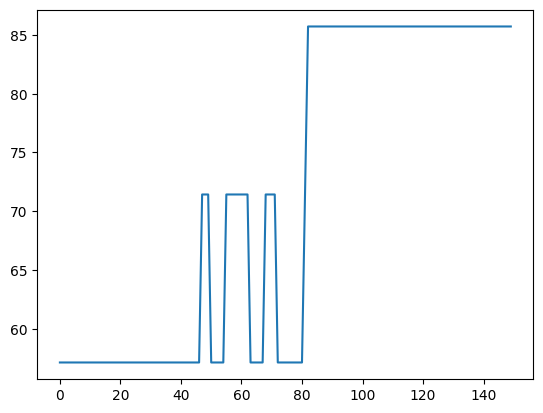

In [ ]:
import matplotlib.pyplot as plt

plt.plot(acc_data)
plt.show()

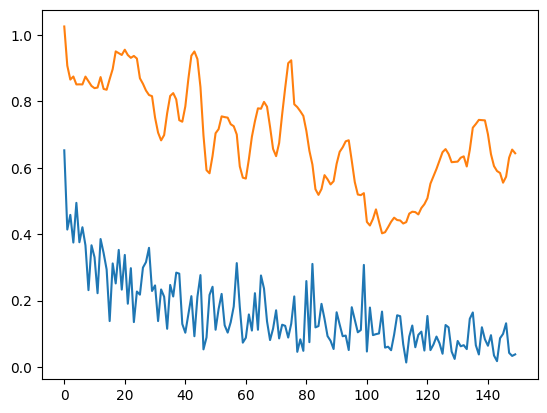

In [ ]:
plt.plot(train_loss_data)
plt.plot(val_loss_data)
plt.show()